<a href="https://colab.research.google.com/github/Pavlov-EV/KOMPOSIT/blob/main/VKR_Pavlov_EV_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и начальная обработка данных, подключение необходимых бибиотек

In [1]:
!gdown 1eLdJ7qpU099VlnFYLHWCkP_i1kPdIhFp

Downloading...
From: https://drive.google.com/uc?id=1eLdJ7qpU099VlnFYLHWCkP_i1kPdIhFp
To: /content/X_bp.xlsx
100% 139k/139k [00:00<00:00, 53.0MB/s]


In [2]:
!gdown 1qiMkaZrAgauAqXUzNi3lwo7pUSyr3Wcc

Downloading...
From: https://drive.google.com/uc?id=1qiMkaZrAgauAqXUzNi3lwo7pUSyr3Wcc
To: /content/X_nup.xlsx
100% 42.4k/42.4k [00:00<00:00, 48.1MB/s]


In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
import pickle

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation, LeakyReLU
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [4]:
x_bp = pd.read_excel('X_bp.xlsx')
x_bp.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0         0.0                         1.857143            2030.0   
1         1.0                         1.857143            2030.0   
2         2.0                         1.857143            2030.0   
3         3.0                         1.857143            2030.0   
4         4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [5]:
# Удаляем первый неинформативный столбец
x_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
x_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [6]:
# Проверяем размерность первого датасета
x_bp.shape

(1023, 10)

In [7]:
x_nup = pd.read_excel('X_nup.xlsx')
x_nup.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0         0.0                 0.0          4.0               57.0
1         1.0                 0.0          4.0               60.0
2         2.0                 0.0          4.0               70.0
3         3.0                 0.0          5.0               47.0
4         4.0                 0.0          5.0               57.0

In [8]:
# Удаляем первый неинформативный столбец
x_nup.drop(['Unnamed: 0'], axis=1, inplace=True)
x_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                 0.0          4.0               57.0
1                 0.0          4.0               60.0
2                 0.0          4.0               70.0
3                 0.0          5.0               47.0
4                 0.0          5.0               57.0

In [9]:
# Проверяем размерность второго датасета
x_nup.shape

(1040, 3)

In [10]:
# Объединяем по индексу (тип объединения INNER)
df = x_bp.merge(x_nup, left_index = True, right_index = True, how = 'inner')
df.head().T

0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

In [11]:
# Проверяем размерность объединенного датасета
df.shape

(1023, 13)

Итоговый датасет имеет 13 столбцов и 1023 строки, 17 строк из таблицы X_nup были отброшены

# Разведочный анализ данных

In [12]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

Все переменные имеют значения float64, качественные характеристики отсутствуют, пропусков нет

In [14]:
# Ищем уникальные значения
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Основная масса стобцов имеет уникальные значение, кроме столбца "Угол нашивки" - он имеет всего 2 значения

In [15]:
df['Угол нашивки, град'].nunique()

2

In [16]:
# Приведем столбец "Угол нашивки" к значениям 0 и 1
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [17]:
# Переименуем столбец
df = df.rename(columns={'Угол нашивки, град' : 'Угол нашивки'})
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
0                       3000.000000               220.000000             0   
1                       3000.000000               220.000000             0   
2                       3000.000000               220.000000             0   
3                       3000.000000               220.000000             0   
4                       3000.000000               220.000000             0   
...                             ...                      ...           ...   
1018                    2387.292495               125.007669             1   
1019                    2360.392784               117.730099             1   
1020                    2662.906040               236.606764             1   
1021                    2071.715856               197.126067      

In [18]:
# Переведем столбец с нумерацией в integer
df.index = df.index.astype('int')

# Описательная статистика

In [19]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                    1023.000000              1023.000000   1023.000000   
mean                     2466.922843               218.423144      0.491691   
std                       485.628006                59.735931      0.500175   
min                      1036.856605                33.803026      0.000000   
25%                      2135.850448               179.627520      0.000000   
50%                      2459.524526               219.198882      0.000000   
75%                      2767.193119               257.481724      1.000000   
max                      3848.436732               414.590628      1.000000   

       Шаг нашивки  Плотность нашивки  
count  1023.000000        1023.000000  
mean      6.899222          57.153929  
std       2.563467          12.350969  
min       0.000000           0.000000  
25%       5.080033          49.799212  
50%       6.916144          57.341920  
75%       8.586293          64.944961  
max      14.440522         103.988901

In [20]:
a = df.describe()
a.T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки                          1023.0     0.491691    0.500175   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки                             0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки                             1.000000     1.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [21]:
# Проверим на наличие пропущенных данных
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропущенных данных нет

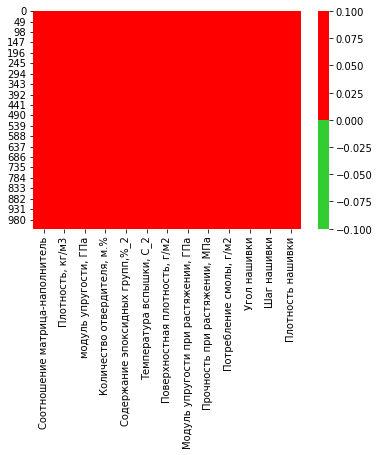

In [22]:
# Построим тепловую карту (зеленый - нет пропущенных данных, красный - пропущенные данные)
cols = df.columns
colours = ['#32CD32', '#FF0000'] 
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))

Тепловая карта, так же показывает, что пропусков нет

In [23]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Соотношение матрица-наполнитель - 0%
Плотность, кг/м3 - 0%
модуль упругости, ГПа - 0%
Количество отвердителя, м.% - 0%
Содержание эпоксидных групп,%_2 - 0%
Температура вспышки, С_2 - 0%
Поверхностная плотность, г/м2 - 0%
Модуль упругости при растяжении, ГПа - 0%
Прочность при растяжении, МПа - 0%
Потребление смолы, г/м2 - 0%
Угол нашивки - 0%
Шаг нашивки - 0%
Плотность нашивки - 0%


In [24]:
# Проверим датасет на дубликаты
df.duplicated().sum()

0

Дубликатов нет

In [25]:
# Получим среднее и медианное значения данных в колонках
mean_and_50 = df.describe()
mean_and_50.loc[['mean', '50%']]

Соотношение матрица-наполнитель  Плотность, кг/м3  \
mean                         2.930366       1975.734888   
50%                          2.906878       1977.621657   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
mean             739.923233                   110.570769   
50%              739.664328                   110.564840   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
mean                        22.244390                285.882151   
50%                         22.230744                285.896812   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
mean                     482.731833                             73.328571   
50%                      451.864365                             73.268805   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
mean                    2466.922843               218.423144      0.491691   
50%                     2459.524526               219.198882      0.000000   

      Шаг нашивки  Плотность нашивки  
mean     6.899222          57.153929  
50%      6.916144          57.341920

Среднее и медианное значения близки друг к другу

In [26]:
# Получим среднее значение
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки                               0.491691
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [27]:
# Получим медианное значение
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки                               0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

In [28]:
# Вычисляем коэффициенты ранговой корреляции Кендалла
df.corr(method = 'kendall')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                            -0.003135   
модуль упругости, ГПа                                        0.021247   
Количество отвердителя, м.%                                  0.001410   
Содержание эпоксидных групп,%_2                              0.010180   
Температура вспышки, С_2                                    -0.009480   
Поверхностная плотность, г/м2                               -0.002060   
Модуль упругости при растяжении, ГПа                        -0.004157   
Прочность при растяжении, МПа                                0.011614   
Потребление смолы, г/м2                                      0.035145   
Угол нашивки                                                -0.021395   
Шаг нашивки                                                  0.022723   
Плотность нашивки                                            0.002788   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель              -0.003135               0.021247   
Плотность, кг/м3                              1.000000              -0.008059   
модуль упругости, ГПа                        -0.008059               1.000000   
Количество отвердителя, м.%                  -0.021963               0.022382   
Содержание эпоксидных групп,%_2              -0.007758               0.002351   
Температура вспышки, С_2                     -0.019947               0.021028   
Поверхностная плотность, г/м2                 0.037302              -0.000442   
Модуль упругости при растяжении, ГПа         -0.021151               0.005458   
Прочность при растяжении, МПа                -0.047426               0.022959   
Потребление смолы, г/м2                      -0.017079               0.005169   
Угол нашивки                                 -0.051525              -0.031695   
Шаг нашивки                                  -0.031220              -0.008305   
Плотность нашивки                             0.052935               0.049347   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.001410   
Плотность, кг/м3                                        -0.021963   
модуль упругости, ГПа                                    0.022382   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.000010   
Температура вспышки, С_2                                 0.059034   
Поверхностная плотность, г/м2                            0.033110   
Модуль упругости при растяжении, ГПа                    -0.043140   
Прочность при растяжении, МПа                           -0.046507   
Потребление смолы, г/м2                                 -0.003677   
Угол нашивки                                             0.024690   
Шаг нашивки                                              0.006232   
Плотность нашивки                                        0.016607   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.010180   
Плотность, кг/м3                                            -0.007758   
модуль упругости, ГПа                                        0.002351   
Количество отвердителя, м.%                                  0.000010   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.002170   
Поверхностная плотность, г/м2                               -0.006859   
Модуль упругости при растяжении, ГПа                         0.041994   
Прочность при растяжении, МПа                               -0.013441   
Потребление смолы, г/м2                                      0.009756   
Угол нашивки                                                 0.004668   
Шаг нашивки                          

Статистической зависимости не наблюдается

In [29]:
# Вычисляем коэффициенты корреляции Пирсона
df.corr(method ='pearson')

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки                                                -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки                                 -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки                                             0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки                                                 0.008052   
Шаг нашивки                          

Статистической зависимости не наблюдается

# Визуализация данных

In [30]:
#Создадим переменную для названия всех столбцов
df.columns
column_names = df.columns
column_names

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

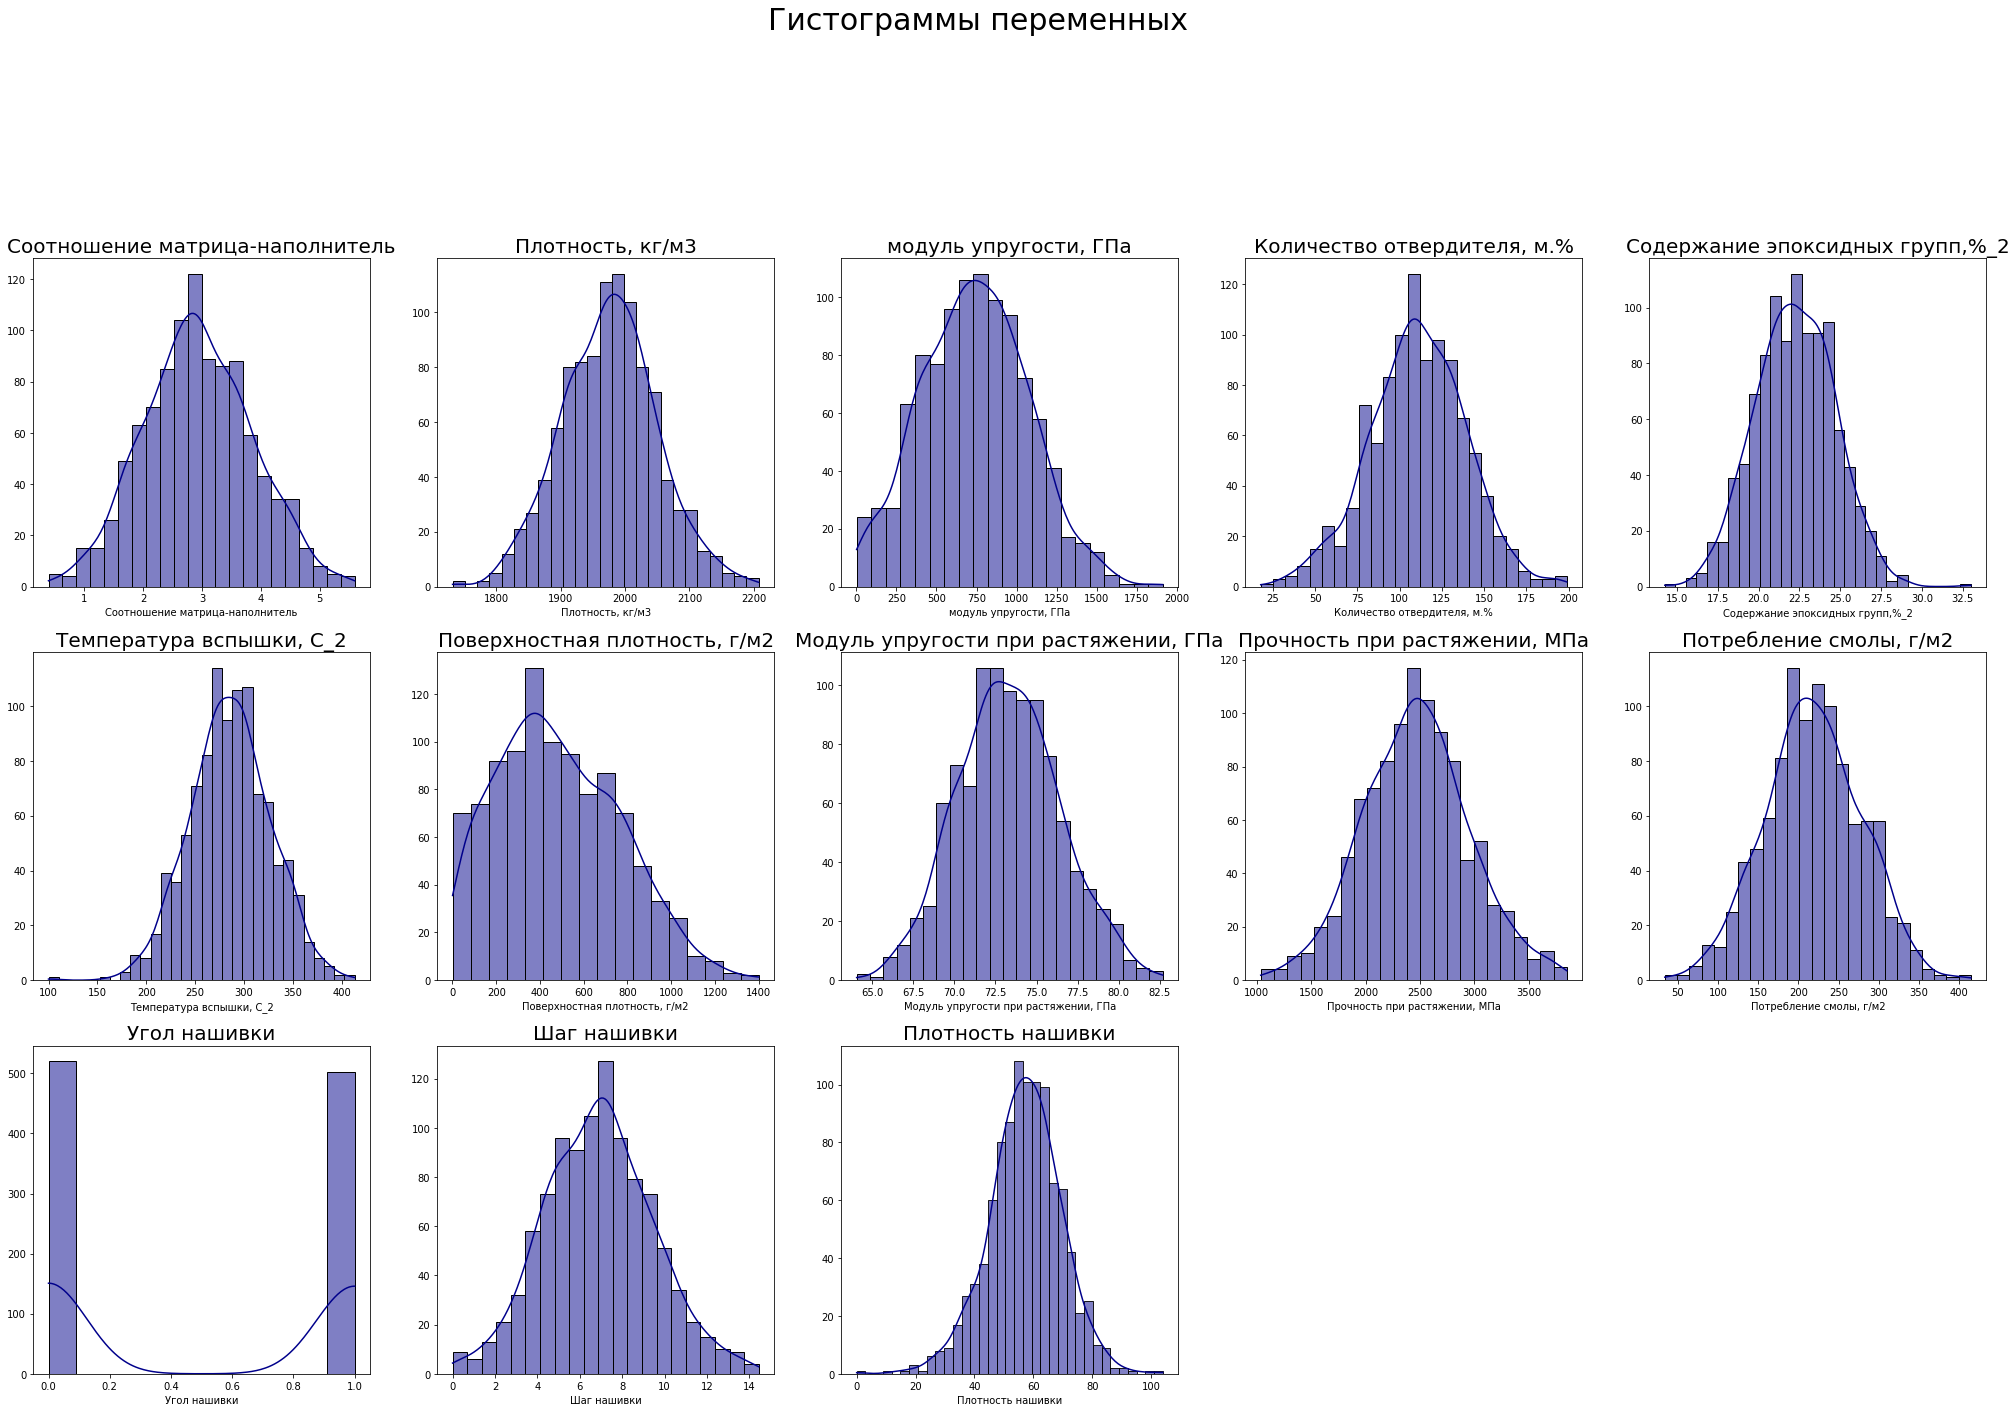

In [31]:
# Построим гистограммы распределения
a = 5 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter
plt.figure(figsize = (35,35))
plt.suptitle('Гистограммы переменных', fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    sns.histplot(data = df[col], kde=True, color = "darkblue")
    plt.ylabel(None)
    plt.title(col, size = 20)
    c += 1 

Данные преимущественно стремятся к нормальному распределению. Угол нашивки имеет два значения - 90 градусов и 0 градусов, что может быть использовано при обработке данных. Учитывая отсутствие иных показателей для угла нашивки, будем использовать в прогнозе категориальный подход при анализе данного параметра

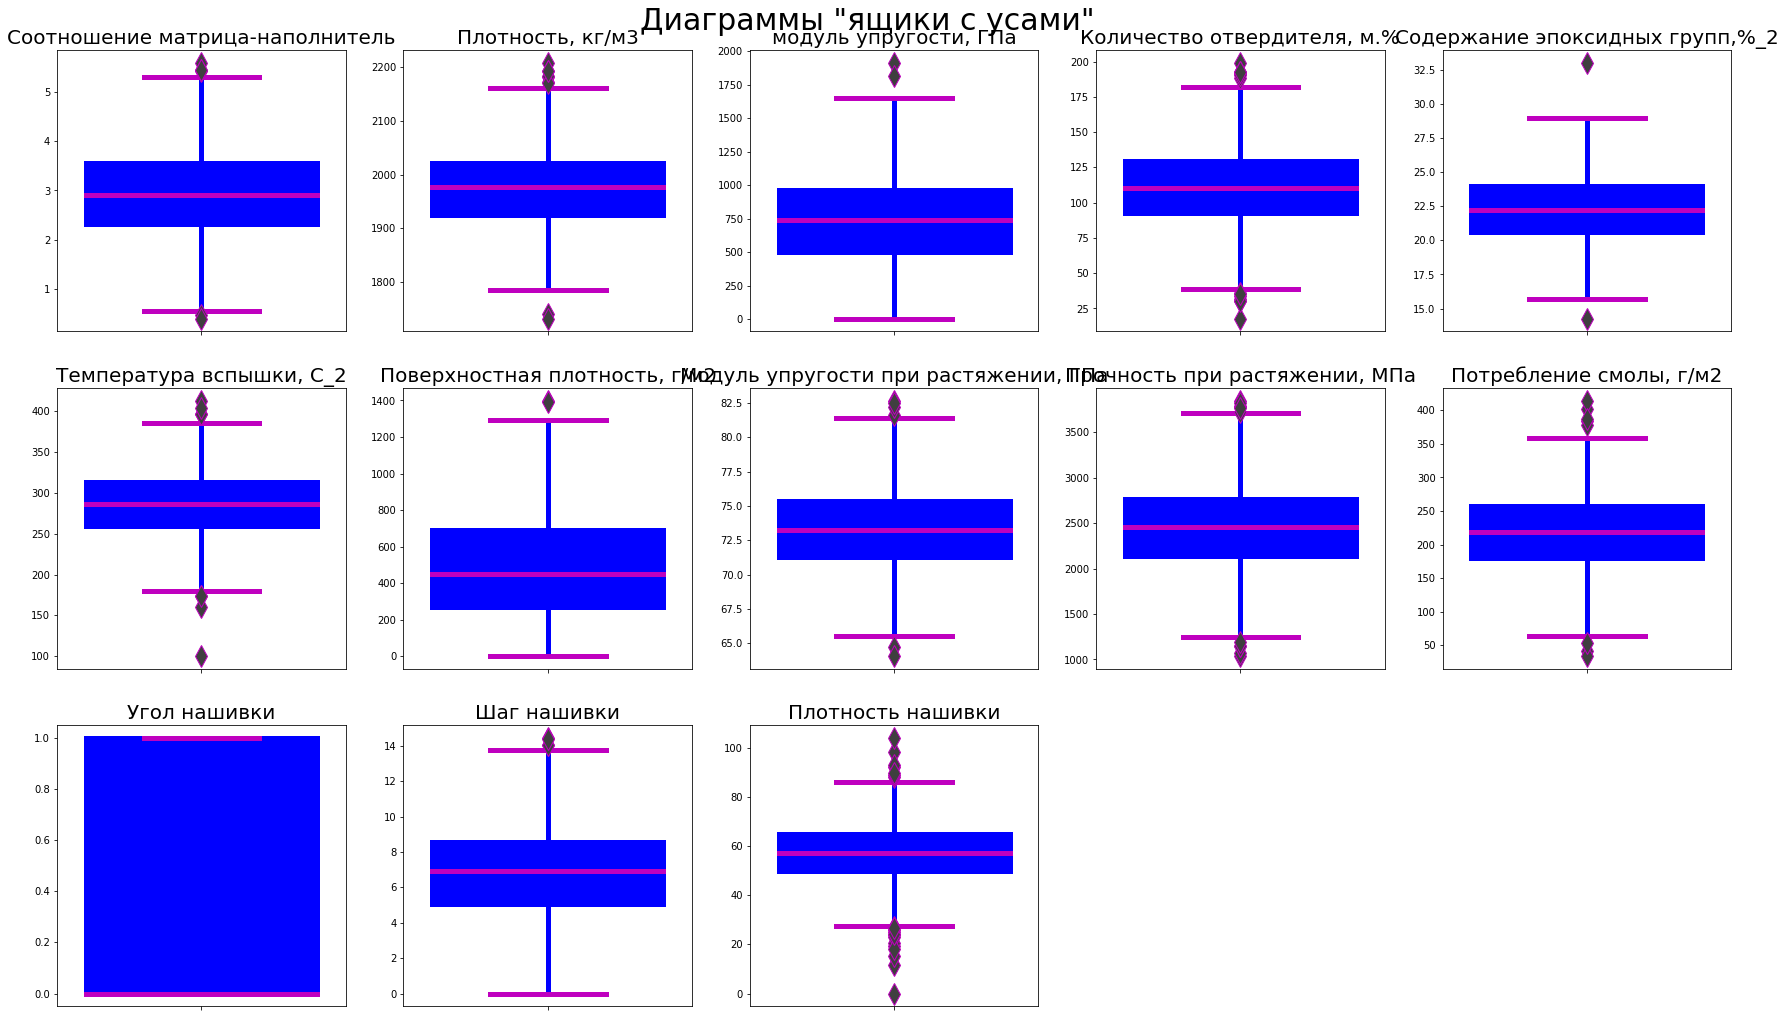

In [32]:
# Построим диаграммы "Ящики с усами"
a = 5 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter

plt.figure(figsize = (30,30))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y = df[col], fliersize = 15, linewidth = 5, boxprops = dict(facecolor = 'm', color = 'b'), medianprops = dict(color = 'm'), whiskerprops = dict(color="b"), capprops = dict(color = "m"), flierprops = dict(color="m", markeredgecolor = "m"))
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1

Диаграммы "Ящики с усами" показывают наличие выбросов во всех столбцах, кроме углов нашивки

Соотношение матрица-наполнитель


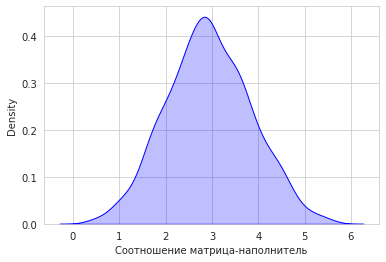

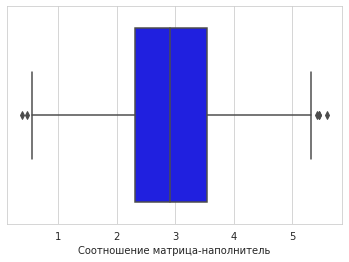

Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.9303657734325483
Медианное значение:  2.90687765033521



Плотность, кг/м3


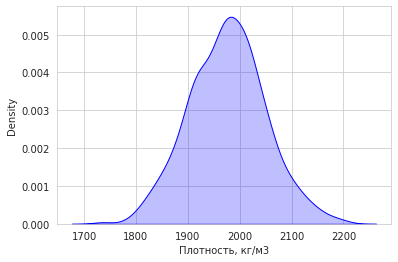

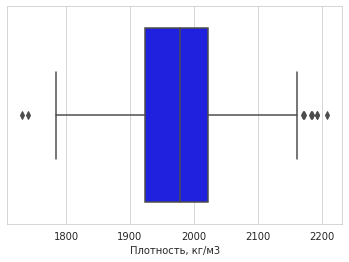

Минимальное значение:  1731.764635096
Максимальное значение:  2207.77348061119
Среднее значение:  1975.7348881101545
Медианное значение:  1977.62165679058



модуль упругости, ГПа


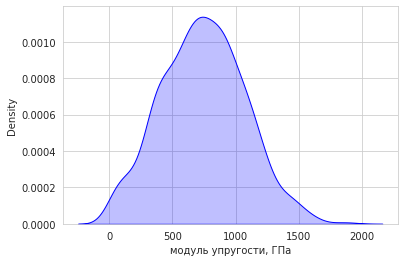

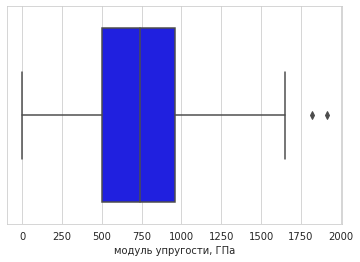

Минимальное значение:  2.4369087535075
Максимальное значение:  1911.53647700054
Среднее значение:  739.9232327560721
Медианное значение:  739.664327697792



Количество отвердителя, м.%


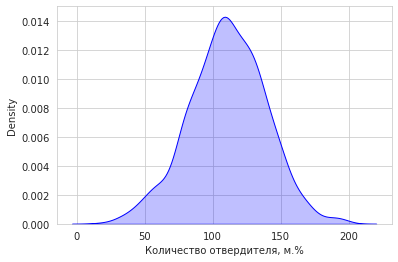

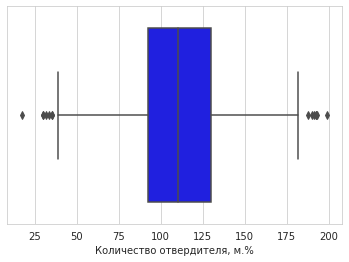

Минимальное значение:  17.7402745562519
Максимальное значение:  198.953207190451
Среднее значение:  110.57076864736254
Медианное значение:  110.564839894065



Содержание эпоксидных групп,%_2


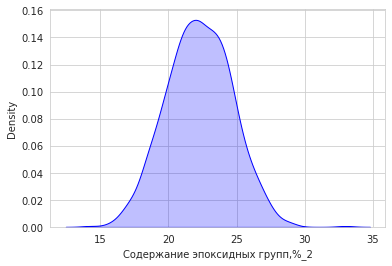

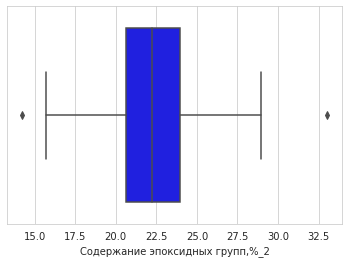

Минимальное значение:  14.2549854977161
Максимальное значение:  33.0
Среднее значение:  22.24438954776773
Медианное значение:  22.2307437560244



Температура вспышки, С_2


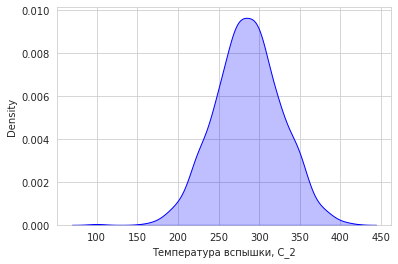

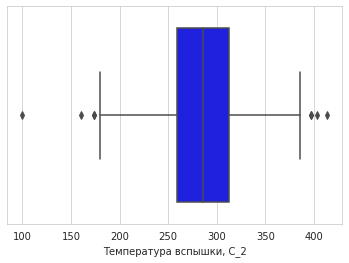

Минимальное значение:  100.0
Максимальное значение:  413.273418243566
Среднее значение:  285.88215135162187
Медианное значение:  285.896812331237



Поверхностная плотность, г/м2


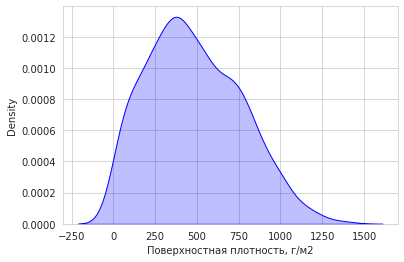

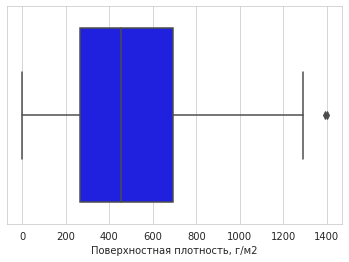

Минимальное значение:  0.603739925153945
Максимальное значение:  1399.54236233989
Среднее значение:  482.73183303841853
Медианное значение:  451.86436518306



Модуль упругости при растяжении, ГПа


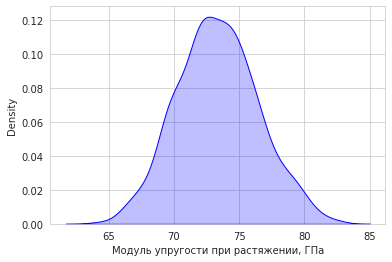

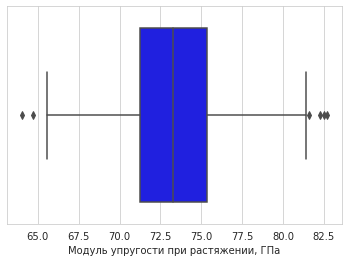

Минимальное значение:  64.0540605597917
Максимальное значение:  82.682051035271
Среднее значение:  73.32857125009068
Медианное значение:  73.2688045943481



Прочность при растяжении, МПа


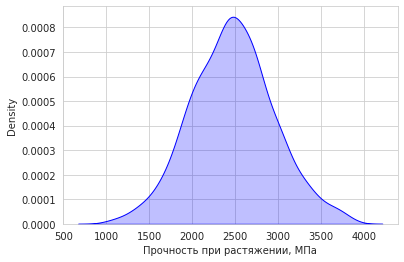

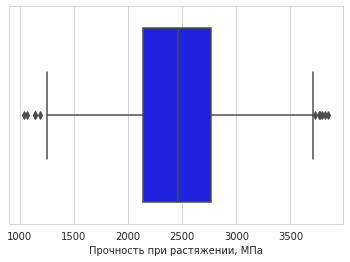

Минимальное значение:  1036.85660535
Максимальное значение:  3848.43673187618
Среднее значение:  2466.922842697902
Медианное значение:  2459.52452600309



Потребление смолы, г/м2


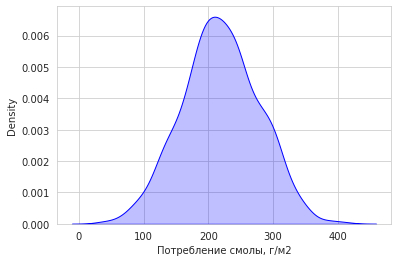

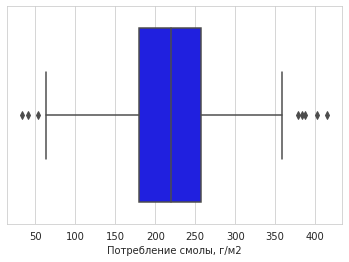

Минимальное значение:  33.8030255329625
Максимальное значение:  414.590628361534
Среднее значение:  218.42314367654285
Медианное значение:  219.198882195134



Угол нашивки


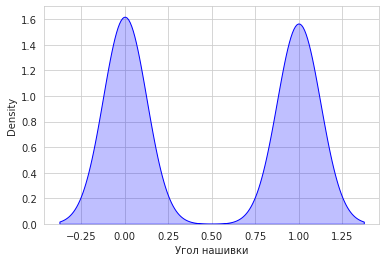

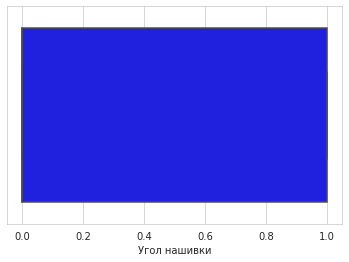

Минимальное значение:  0
Максимальное значение:  1
Среднее значение:  0.4916911045943304
Медианное значение:  0.0



Шаг нашивки


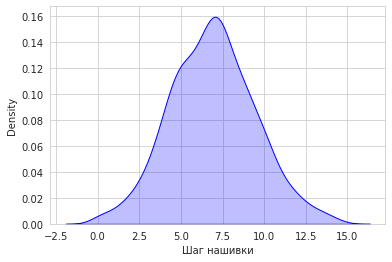

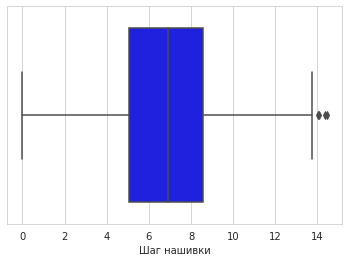

Минимальное значение:  0.0
Максимальное значение:  14.4405218753969
Среднее значение:  6.8992220776750175
Медианное значение:  6.9161438559491



Плотность нашивки


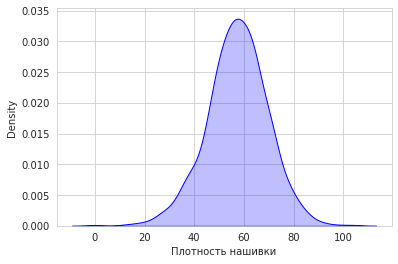

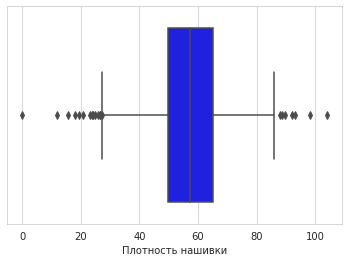

Минимальное значение:  0.0
Максимальное значение:  103.988901301494
Среднее значение:  57.153929432857645
Медианное значение:  57.3419198469929





In [33]:
# Построим гистограммы распределения и диаграммы "ящик с усами" вместе с данными по каждому столбцу
for column_name in column_names:
    print(column_name)
    
    #Гистограммы распределения
    gis = df[column_name]
    sns.set_style("whitegrid")
    sns.kdeplot(data = gis, shade = True, palette ='colorblind', color = "b")
    plt.show()
    
    #Диаграммы "Ящик с усами"
    sns.boxplot(x=gis, color = "b");
    plt.show()
    
    #Значения
    print("Минимальное значение: ", end = " ")
    print(np.min(gis))
    print("Максимальное значение: ", end=" ")
    print(np.max(gis))
    print("Среднее значение: ", end = " ")
    print(np.mean(gis))
    print("Медианное значение: ", end = " ")
    print(np.median(gis))
    print("\n\n")

Кроме "Угол нашивки, град" и "Поверхностная плотность, г/м2" остальные переменные в основном соответствуют нормальному распределению

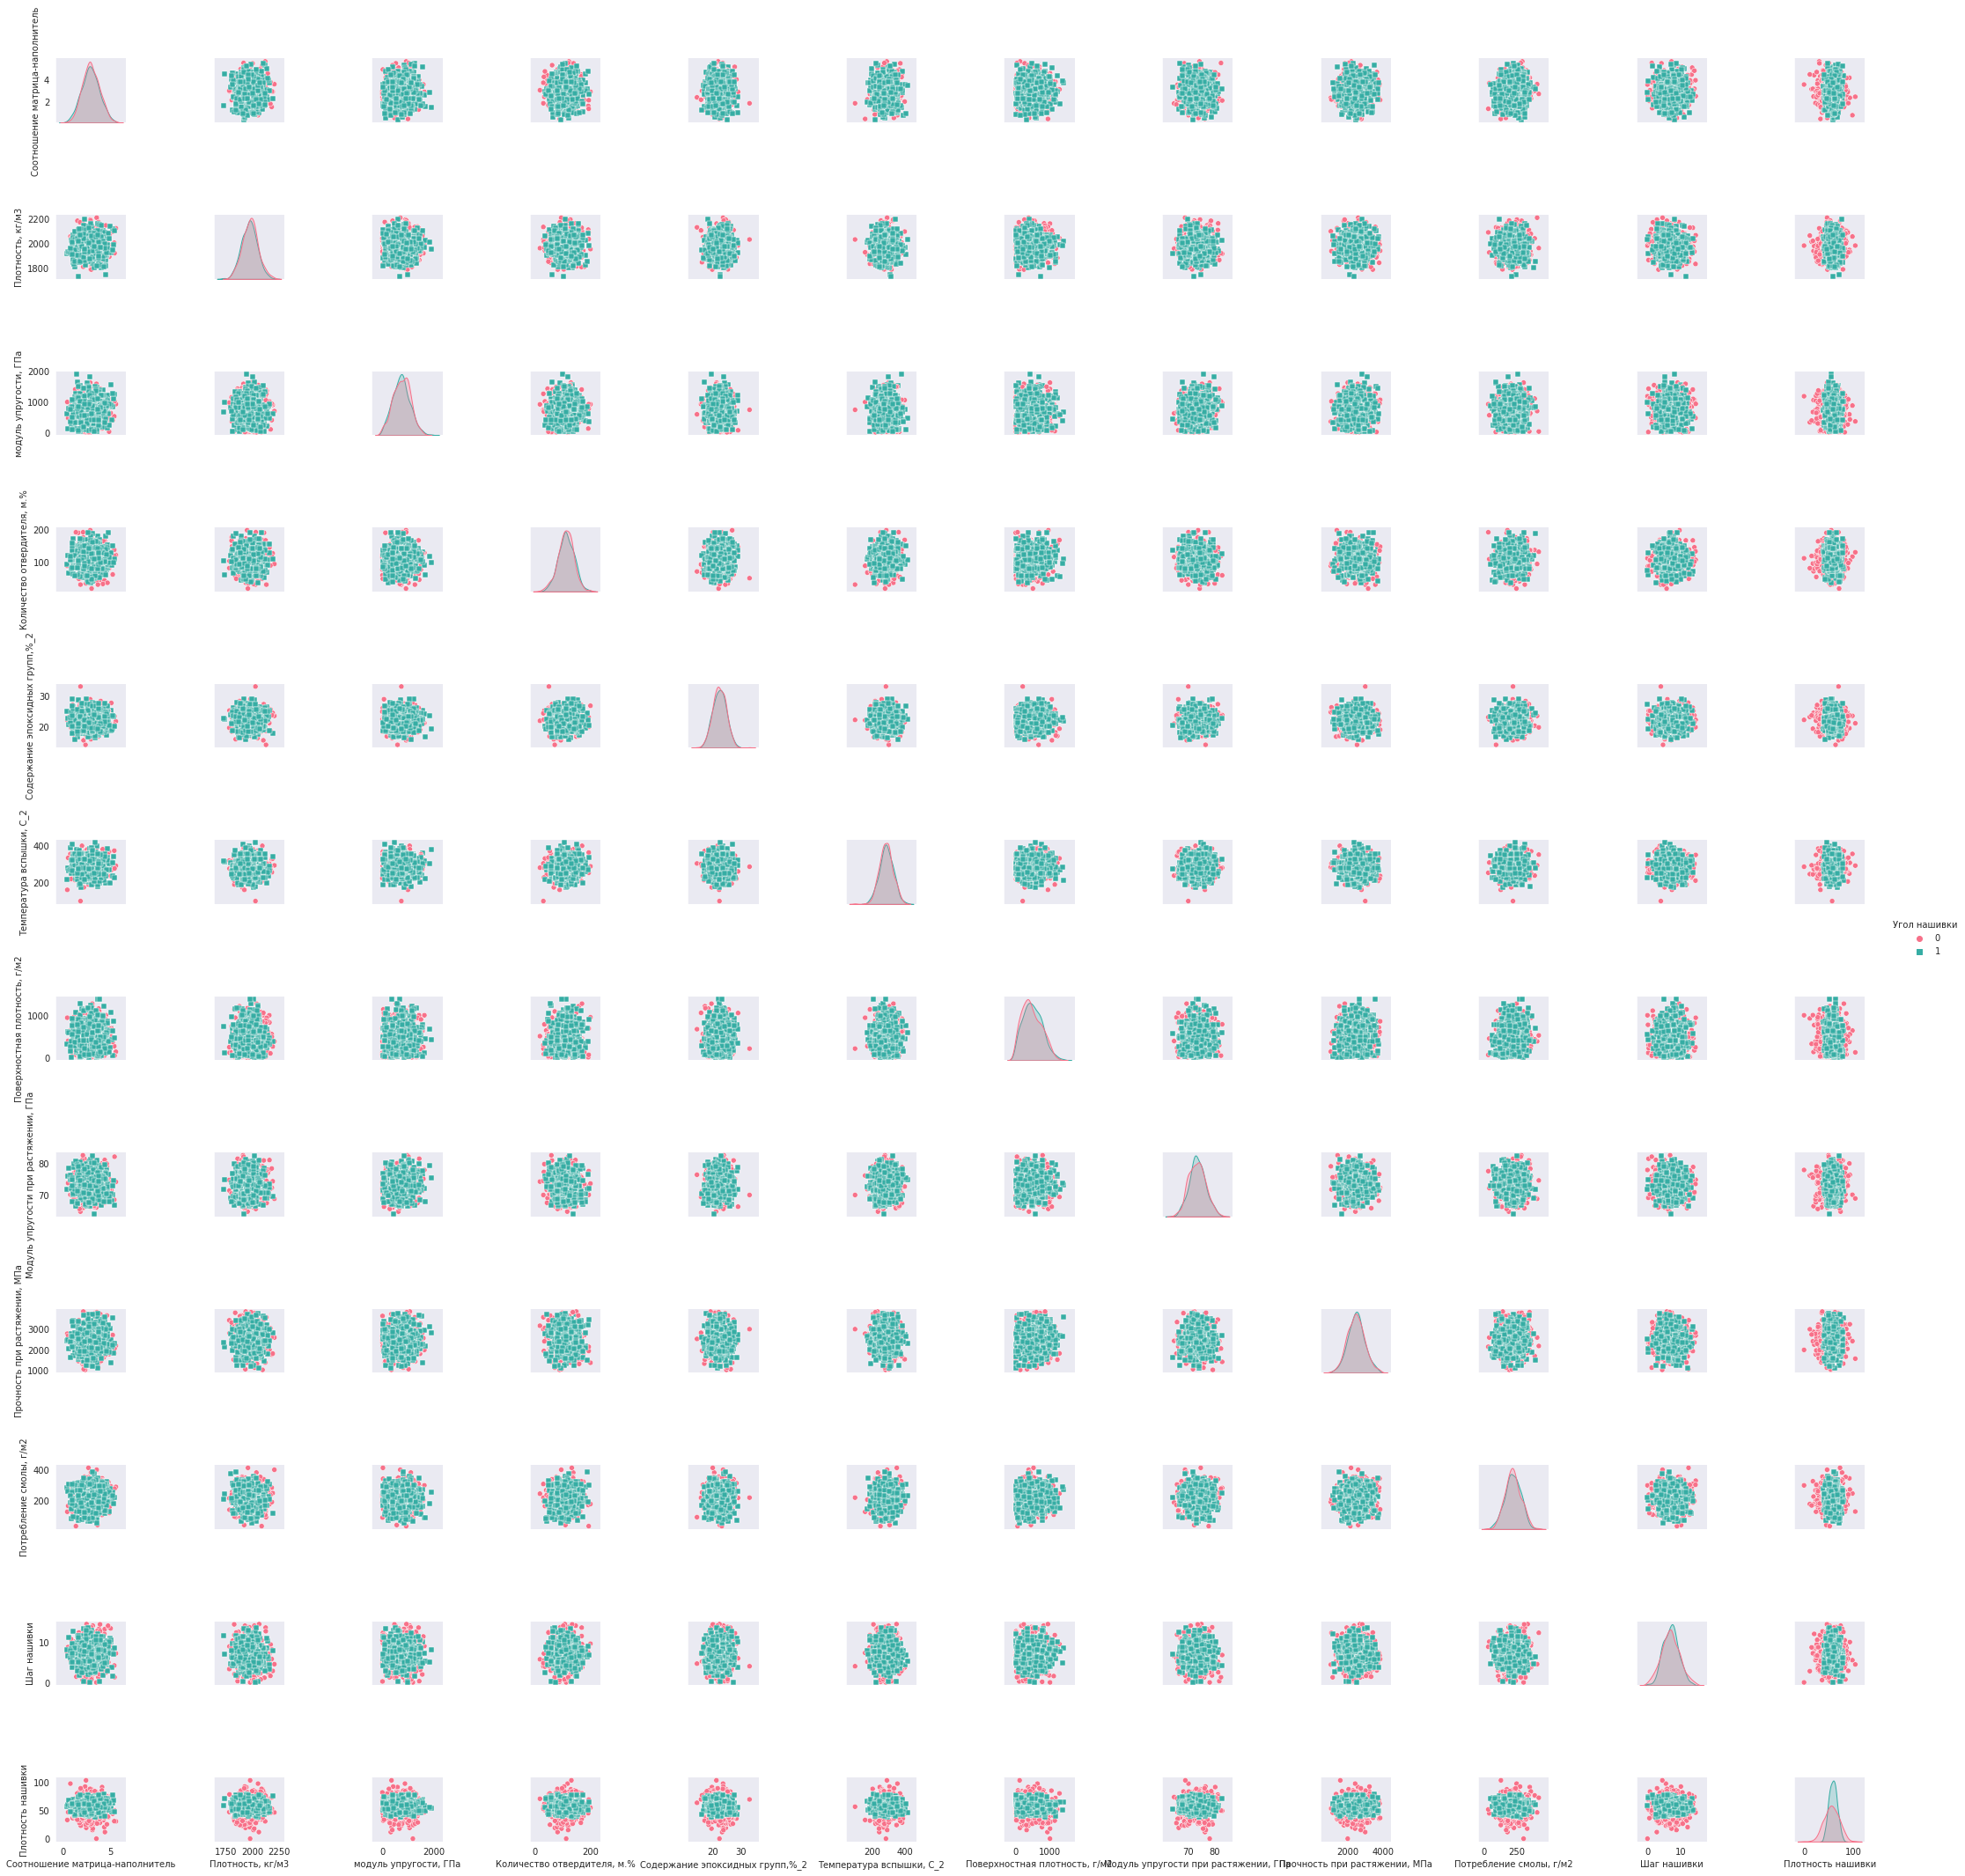

In [34]:
# Попарные графики рассеяния точек
sns.set_style('dark')
sns.pairplot(df, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette='husl')

Попарные графики рассеяния точек так же не показывают какой-либо зависимости между данными. Из графиков видно наличие выбросов

# Удаление выбросов

In [35]:
# Посчитаемколичество значений в каждом столбце выбивающихся из распределения
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Выбивающихся значений не очень много, их можно исключить

In [36]:
#Для удаления выбросов воспользуемся методом 3 сигм
metod_3s = 0
count_3s = [] 
for column in df:
    d = df.loc[:, [column]]
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    metod_3s += d['3s'].sum()
    count_3s.append(d['3s'].sum())
    print(column,'3s', ': ', d['3s'].sum())

Соотношение матрица-наполнитель 3s :  0
Плотность, кг/м3 3s :  3
модуль упругости, ГПа 3s :  2
Количество отвердителя, м.% 3s :  2
Содержание эпоксидных групп,%_2 3s :  2
Температура вспышки, С_2 3s :  3
Поверхностная плотность, г/м2 3s :  2
Модуль упругости при растяжении, ГПа 3s :  0
Прочность при растяжении, МПа 3s :  0
Потребление смолы, г/м2 3s :  3
Угол нашивки 3s :  0
Шаг нашивки 3s :  0
Плотность нашивки 3s :  7


In [37]:
# Для предотвращения удаления особенностей признака или допущения ошибки, посчитаем распределение выбросов по каждому столбцу
m = df.copy()
for i in df.columns:
    m[i] = abs((df[i] - df[i].mean()) / df[i].std())
    print(f"{sum(m[i] > 3)} выбросов в признаке {i}")
print(f' Всего {sum(sum(m.values > 3))} выброса')

0 выбросов в признаке Соотношение матрица-наполнитель
3 выбросов в признаке Плотность, кг/м3
2 выбросов в признаке модуль упругости, ГПа
2 выбросов в признаке Количество отвердителя, м.%
2 выбросов в признаке Содержание эпоксидных групп,%_2
3 выбросов в признаке Температура вспышки, С_2
2 выбросов в признаке Поверхностная плотность, г/м2
0 выбросов в признаке Модуль упругости при растяжении, ГПа
0 выбросов в признаке Прочность при растяжении, МПа
3 выбросов в признаке Потребление смолы, г/м2
0 выбросов в признаке Угол нашивки
0 выбросов в признаке Шаг нашивки
7 выбросов в признаке Плотность нашивки
 Всего 24 выброса


Выбросы распределены по разным столбцам, скопления выбросов в каком-либо столбце не обнаружено, поэтому можно удалить выбросы

In [38]:
#Создадим переменную со списком всех столбцов, в которых есть выбросы
df.columns
column_list_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

In [39]:
# Удалим выбросы методом 3 сигм
m_3s = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    m_3s[column] = (zscore.abs() > 3)
df = df[m_3s.sum(axis=1)==0]
df.shape

(1000, 13)

In [40]:
#Удалим строки c выбросами
df = df.dropna(axis=0)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки                          1000 non-null   int64  
 11  Шаг нашивки      

После удаления выбросов в датасете осталось 996 строк и 13 колонок

In [42]:
#Создадим новую переменную для названия всех столбцов после удаления выбросов
df.columns
column_names = df.columns
column_names

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

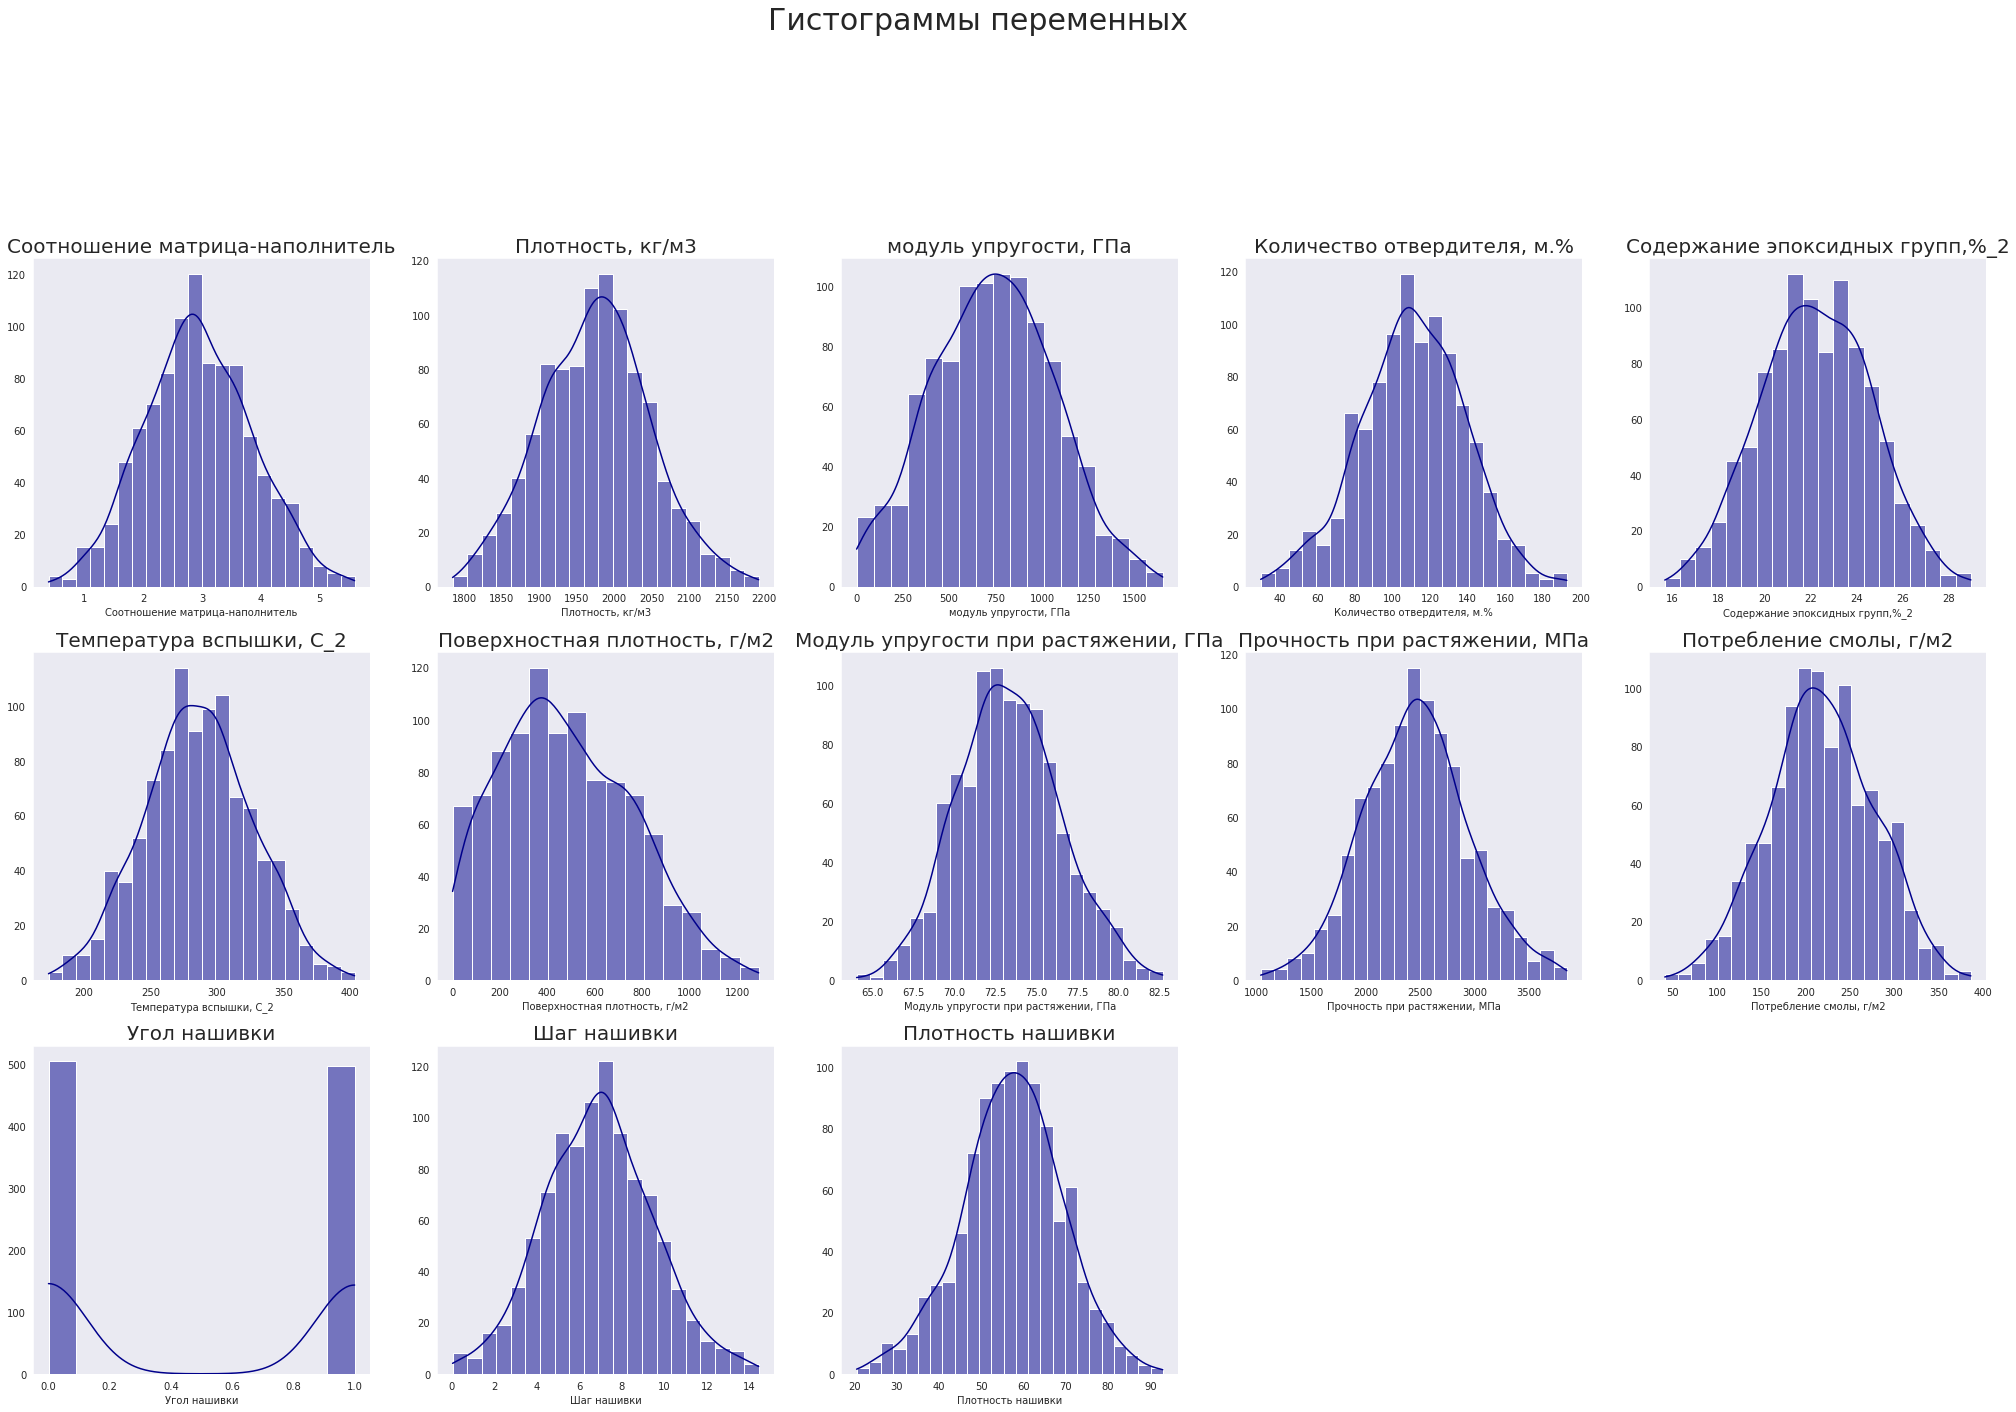

In [43]:
# Снова построим гистограммы распределения после удаления выбросов
a = 5 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter
plt.figure(figsize = (35,35))
plt.suptitle('Гистограммы переменных', fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    sns.histplot(data = df[col], kde=True, color = "darkblue")
    plt.ylabel(None)
    plt.title(col, size = 20)
    c += 1 

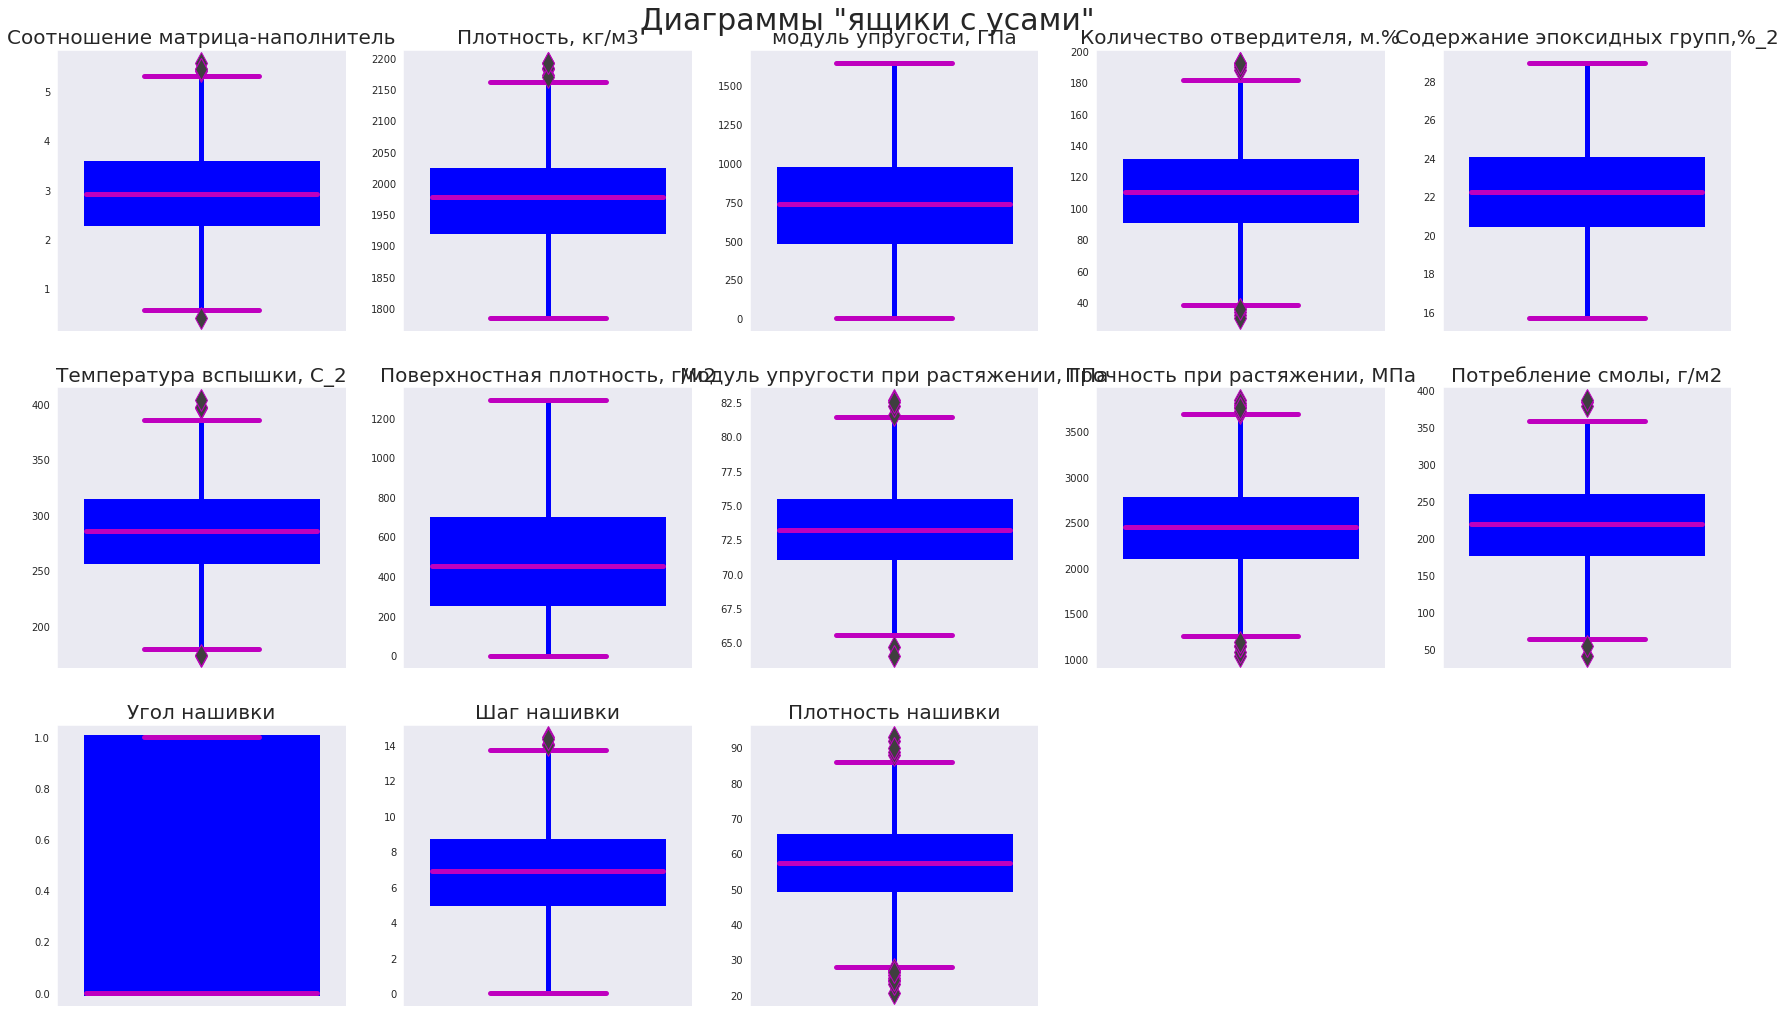

In [44]:
# Снова построим диаграммы "Ящики с усами" после удаления выбросов
a = 5 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter

plt.figure(figsize = (30,30))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y = df[col], fliersize = 15, linewidth = 5, boxprops = dict(facecolor = 'm', color = 'b'), medianprops = dict(color = 'm'), whiskerprops = dict(color="b"), capprops = dict(color = "m"), flierprops = dict(color="m", markeredgecolor = "m"))
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1

Соотношение матрица-наполнитель


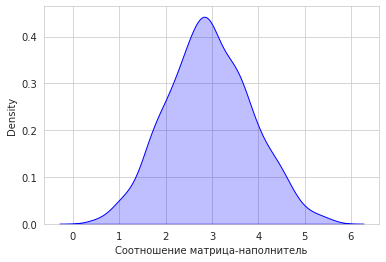

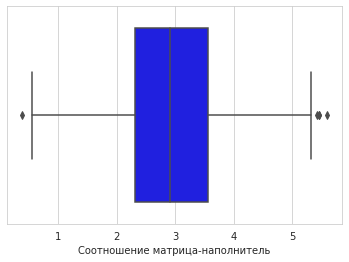

Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.936299057925621
Медианное значение:  2.90881075347652



Плотность, кг/м3


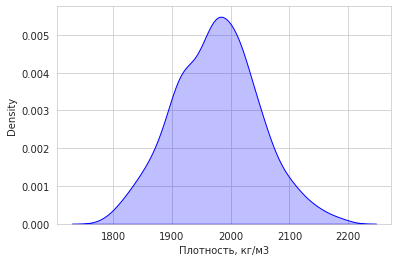

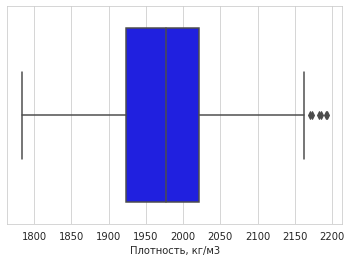

Минимальное значение:  1784.48224524858
Максимальное значение:  2192.73878348
Среднее значение:  1975.402477646479
Медианное значение:  1977.3210016945



модуль упругости, ГПа


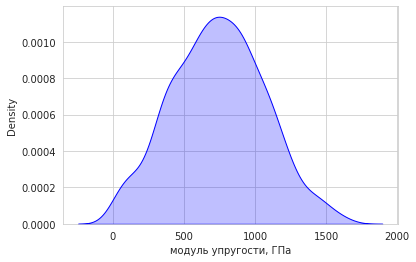

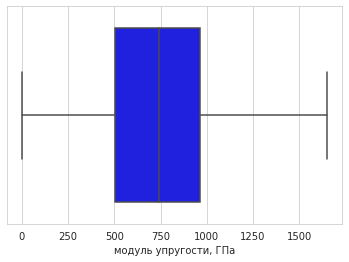

Минимальное значение:  2.4369087535075
Максимальное значение:  1649.41570587587
Среднее значение:  738.6754858772713
Медианное значение:  741.1481108873741



Количество отвердителя, м.%


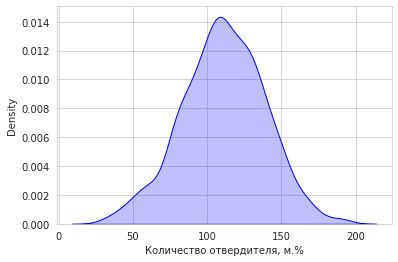

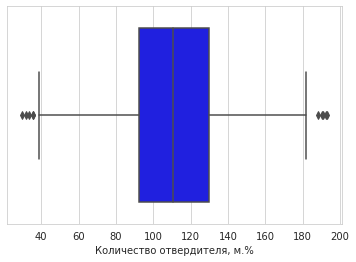

Минимальное значение:  29.9561496534826
Максимальное значение:  192.85170183308
Среднее значение:  110.82190408078286
Медианное значение:  110.6526201633845



Содержание эпоксидных групп,%_2


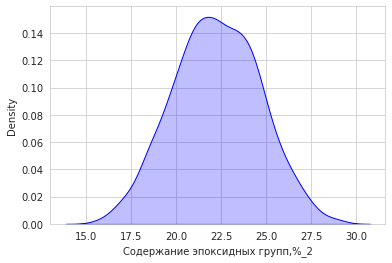

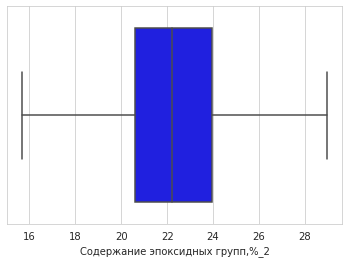

Минимальное значение:  15.6958938036288
Максимальное значение:  28.9550943746499
Среднее значение:  22.23554906046059
Медианное значение:  22.22146225581115



Температура вспышки, С_2


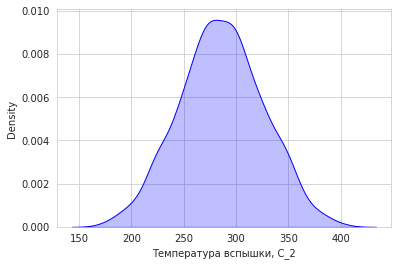

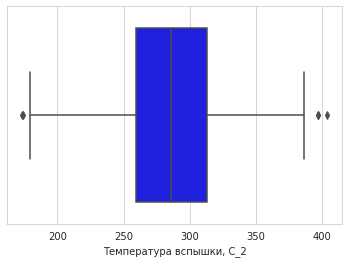

Минимальное значение:  173.484919924459
Максимальное значение:  403.652860876814
Среднее значение:  285.957299319611
Медианное значение:  285.853960396184



Поверхностная плотность, г/м2


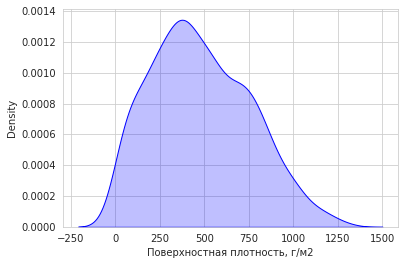

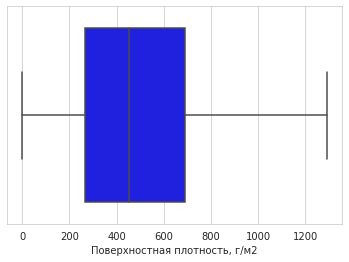

Минимальное значение:  0.603739925153945
Максимальное значение:  1291.34011463545
Среднее значение:  479.8558254751938
Медианное значение:  450.86953515881396



Модуль упругости при растяжении, ГПа


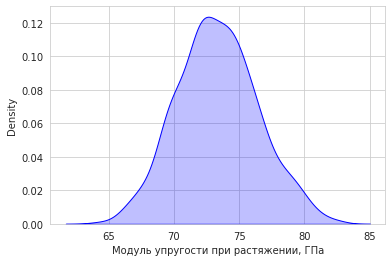

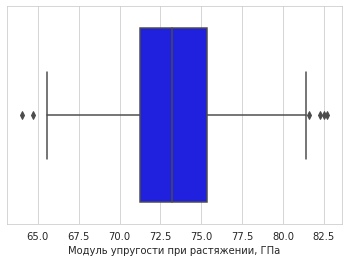

Минимальное значение:  64.0540605597917
Максимальное значение:  82.682051035271
Среднее значение:  73.31817763591421
Медианное значение:  73.23037496844105



Прочность при растяжении, МПа


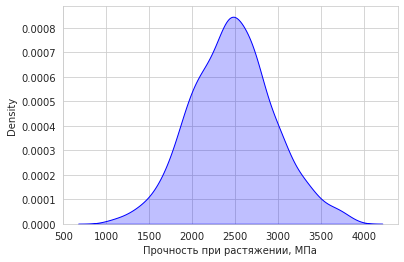

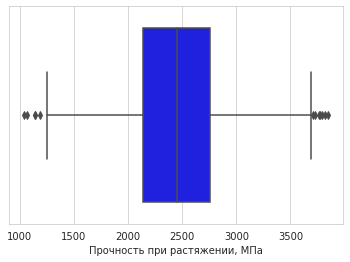

Минимальное значение:  1036.85660535
Максимальное значение:  3848.43673187618
Среднее значение:  2464.8641983084385
Медианное значение:  2456.3941884086553



Потребление смолы, г/м2


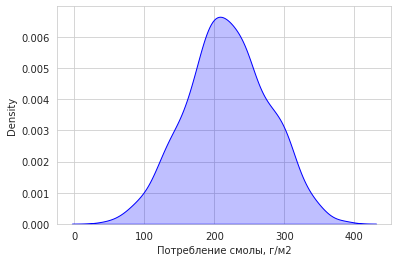

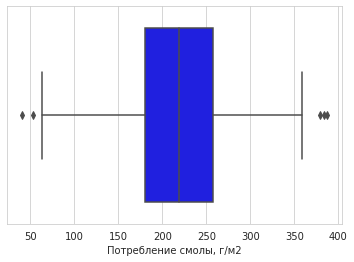

Минимальное значение:  41.0482779512307
Максимальное значение:  386.903431430897
Среднее значение:  218.25401110343716
Медианное значение:  218.697659676914



Угол нашивки


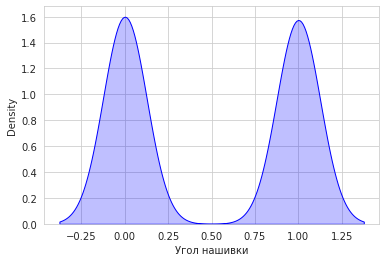

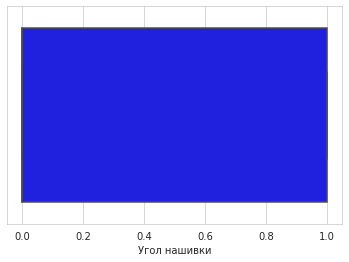

Минимальное значение:  0
Максимальное значение:  1
Среднее значение:  0.496
Медианное значение:  0.0



Шаг нашивки


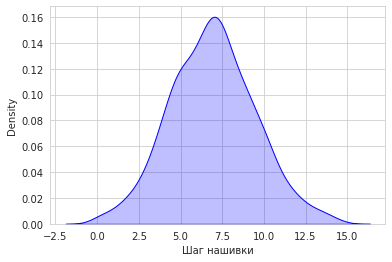

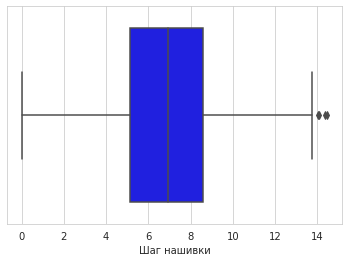

Минимальное значение:  0.0376389366987437
Максимальное значение:  14.4405218753969
Среднее значение:  6.9105997105178645
Медианное значение:  6.9221955059923



Плотность нашивки


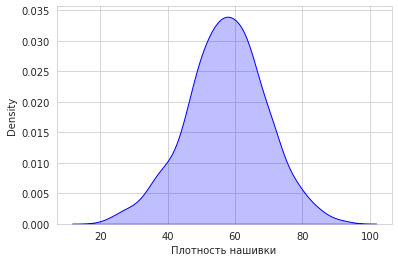

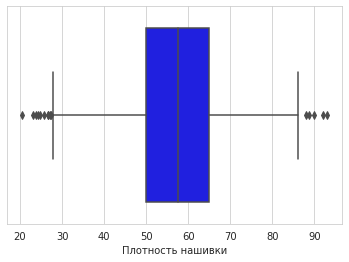

Минимальное значение:  20.5716333306441
Максимальное значение:  92.9634919477473
Среднее значение:  57.276292500262905
Медианное значение:  57.47197143569305





In [45]:
# Построим гистограммы распределения и диаграммы "ящик с усами" вместе с данными по каждому столбцу
for column_name in column_names:
    print(column_name)
    
    #Гистограммы распределения
    gis = df[column_name]
    sns.set_style("whitegrid")
    sns.kdeplot(data = gis, shade = True, palette ='colorblind', color = "b")
    plt.show()
    
    #Диаграммы "Ящик с усами"
    sns.boxplot(x=gis, color = "b");
    plt.show()
    
    #Значения
    print("Минимальное значение: ", end = " ")
    print(np.min(gis))
    print("Максимальное значение: ", end=" ")
    print(np.max(gis))
    print("Среднее значение: ", end = " ")
    print(np.mean(gis))
    print("Медианное значение: ", end = " ")
    print(np.median(gis))
    print("\n\n")

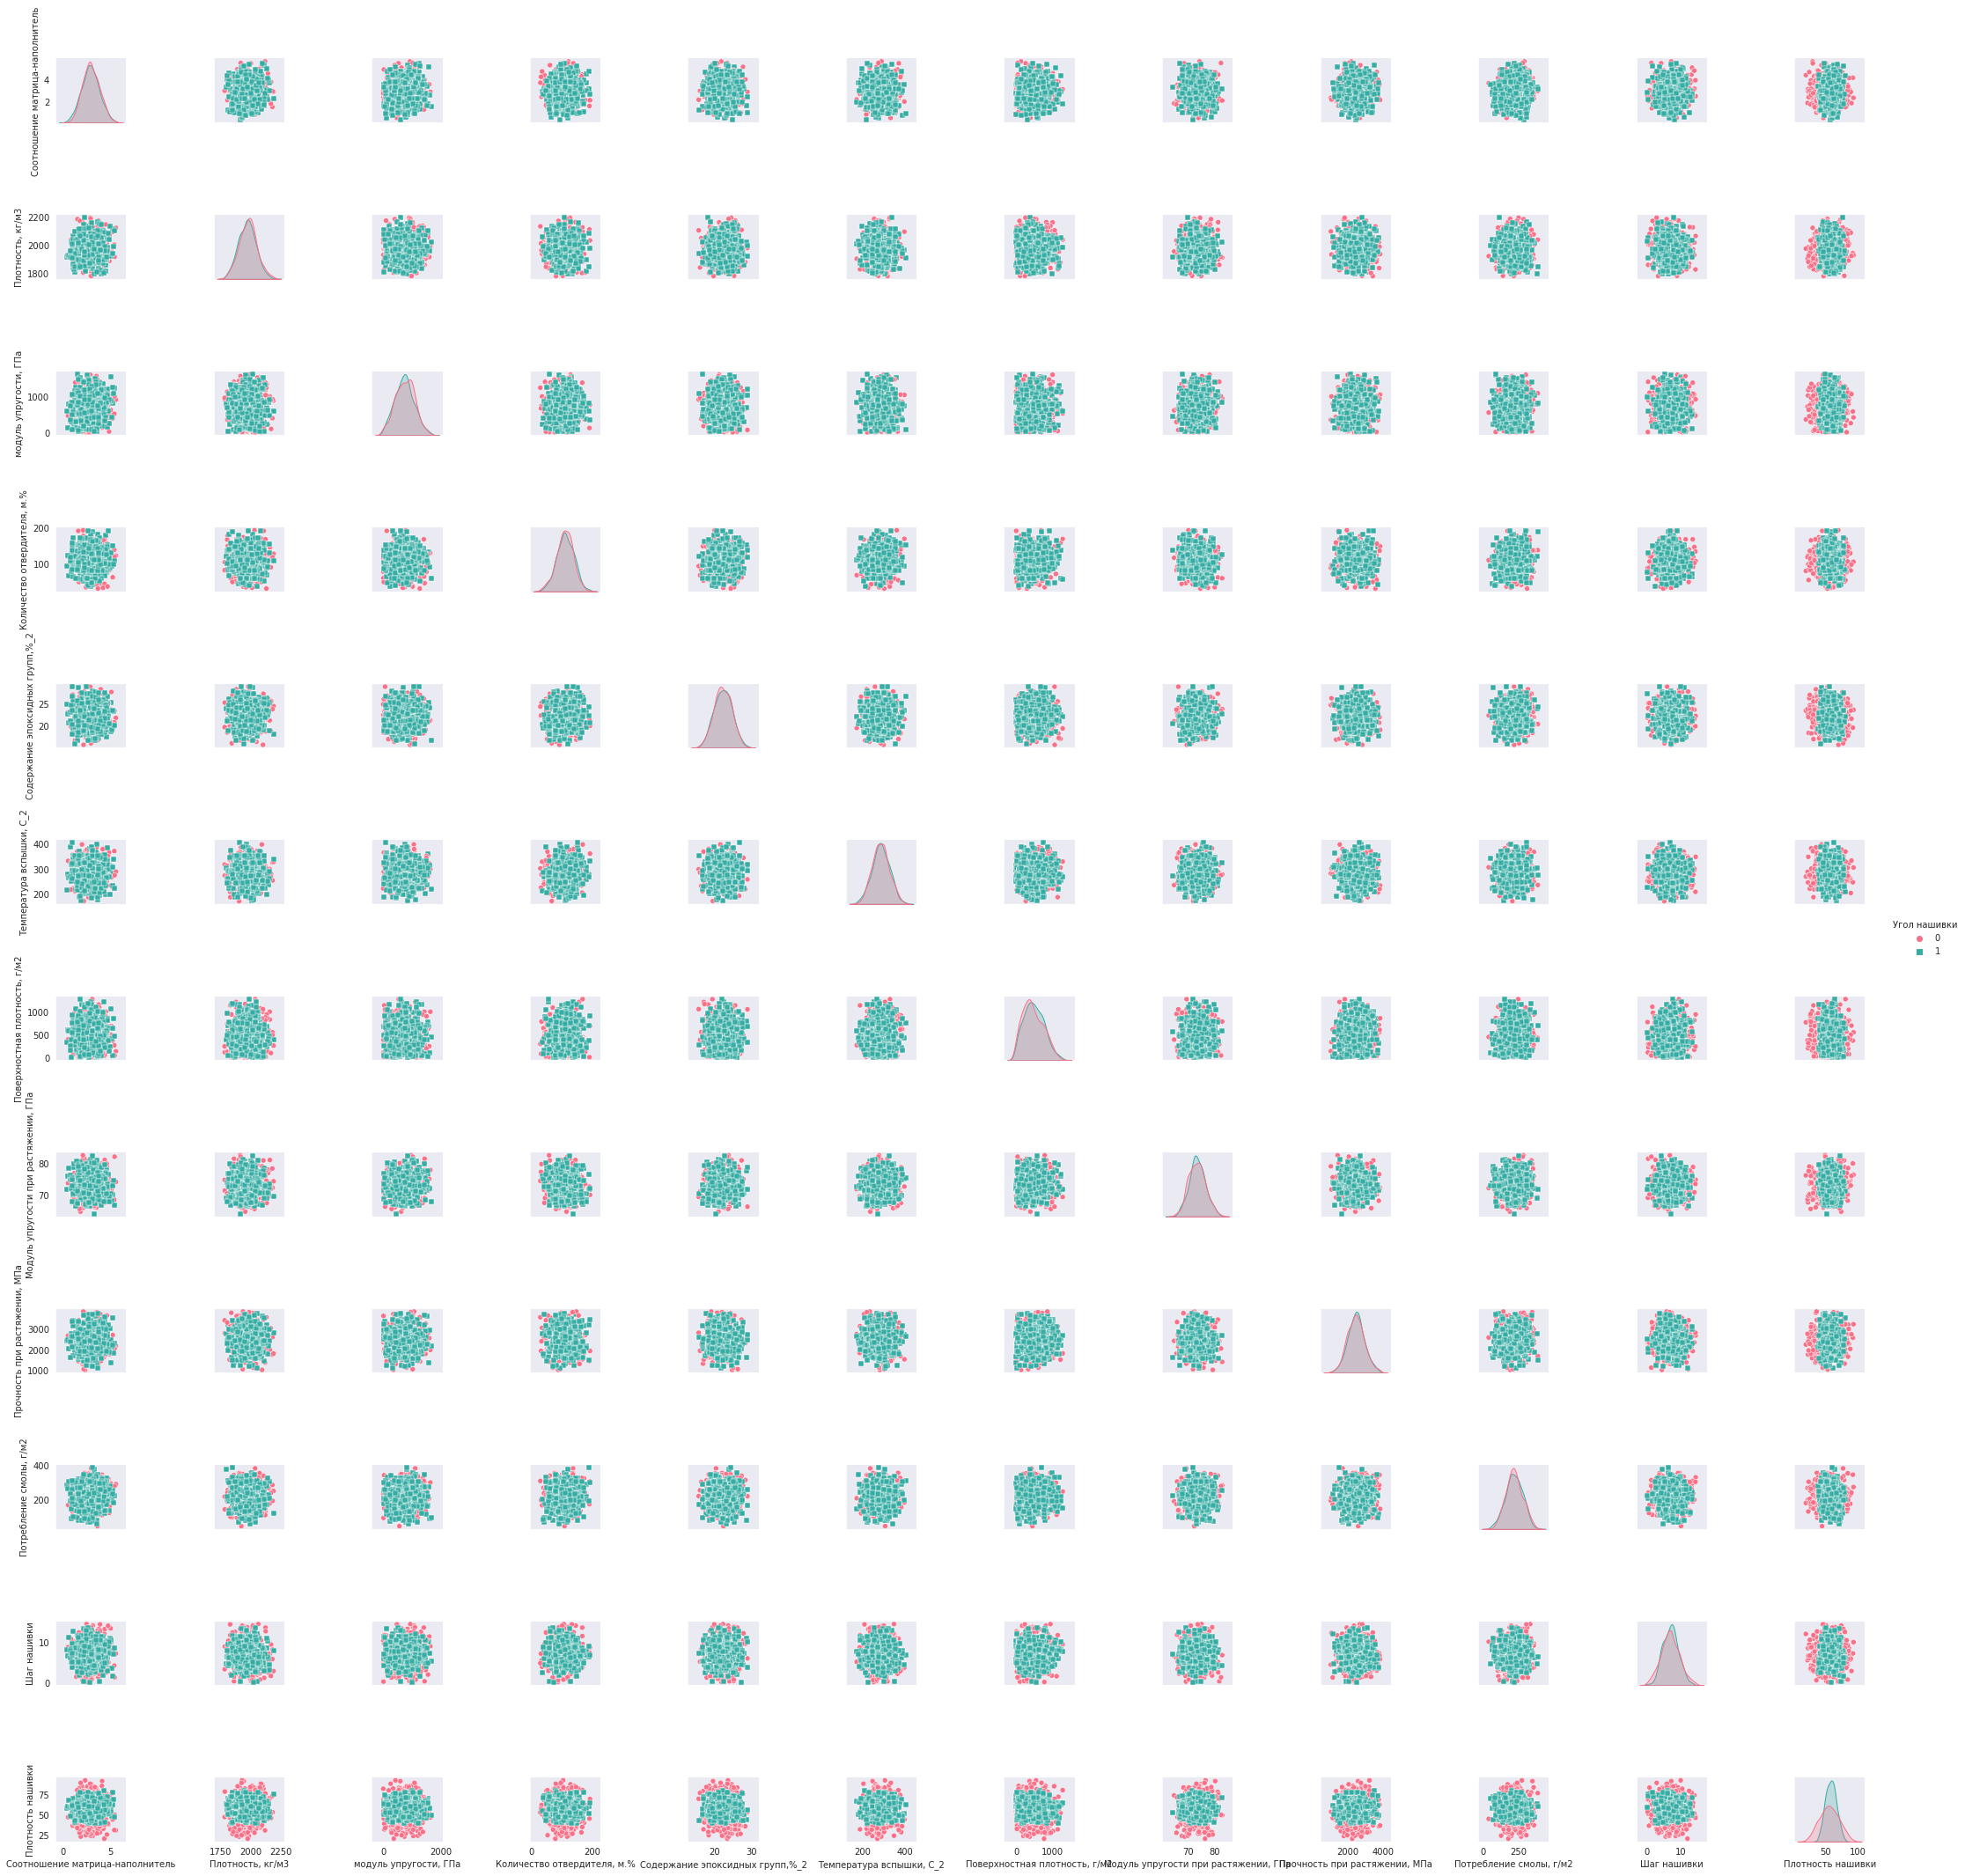

In [46]:
# Попарные графики рассеяния точек
sns.set_style('dark')
sns.pairplot(df, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette='husl')

# Нормализация и стандартизация данных

In [47]:
df_norm = df.copy()

In [48]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки                          1000 non-null   int64  
 11  Шаг нашивки      

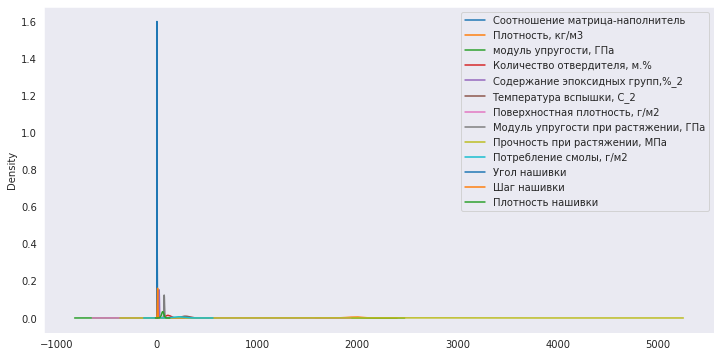

In [49]:
fig, ax = plt.subplots(figsize = (12, 6))
df_norm.plot(kind = 'kde', ax = ax)

Оценка плотности ядра показывает, что наши данные находятся в разных диапазонах, что говорит о необходимости нормализации данных

In [50]:
# Нормализуем данные c помощью MinMaxScaler()
scaler = preprocessing.MinMaxScaler()
col = df.columns
result = scaler.fit_transform(df)

df_minmax_n = pd.DataFrame(result, columns = col)
df_minmax_n.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1000.000000       1000.000000   
mean                          0.489568          0.467648   
std                           0.174687          0.178696   
min                           0.000000          0.000000   
25%                           0.370964          0.340831   
50%                           0.484284          0.472347   
75%                           0.608289          0.579727   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1000.000000                  1000.000000   
mean                0.447024                     0.496427   
std                 0.198876                     0.171089   
min                 0.000000                     0.000000   
25%                 0.302576                     0.384097   
50%                 0.448525                     0.495388   
75%                 0.582408                     0.613258   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1000.000000               1000.000000   
mean                          0.493216                  0.488654   
std                           0.179818                  0.174792   
min                           0.000000                  0.000000   
25%                           0.368597                  0.371985   
50%                           0.492154                  0.488205   
75%                           0.624396                  0.606271   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1000.000000                           1000.000000   
mean                        0.371301                              0.497322   
std                         0.215155                              0.167158   
min                         0.000000                              0.000000   
25%                         0.206374                              0.386234   
50%                         0.348844                              0.492609   
75%                         0.535295                              0.605138   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                    1000.000000              1000.000000   1000.000000   
mean                        0.507902                 0.512370      0.496000   
std                         0.172506                 0.170432      0.500234   
min                         0.000000                 0.000000      0.000000   
25%                         0.390414                 0.401220      0.000000   
50%                         0.504890                 0.513653      0.000000   
75%                         0.612932                 0.625772      1.000000   
max                         1.000000                 1.000000      1.000000   

       Шаг нашивки  Плотность нашивки  
count  1000.000000        1000.000000  
mean      0.477193           0.507027  
std       0.177586           0.163634  
min       0.000000           0.000000  
25%       0.351886           0.405037  
50%       0.477999           0.509730  
75%       0.593714           0.612766  
max       1.000000           1.000000

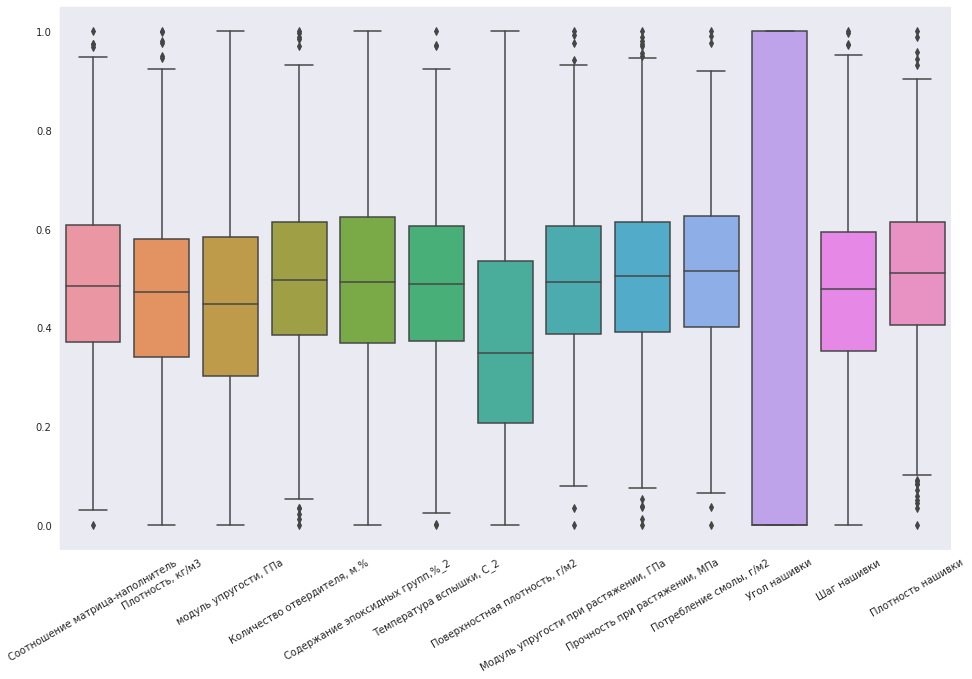

In [51]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_minmax_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

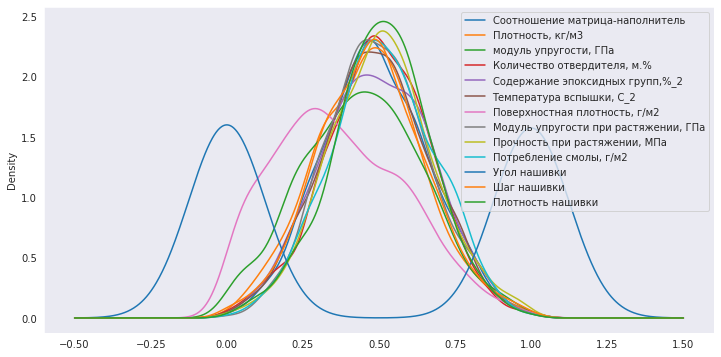

In [52]:
fig, ax = plt.subplots(figsize = (12, 6))
df_minmax_n.plot(kind = 'kde', ax = ax)

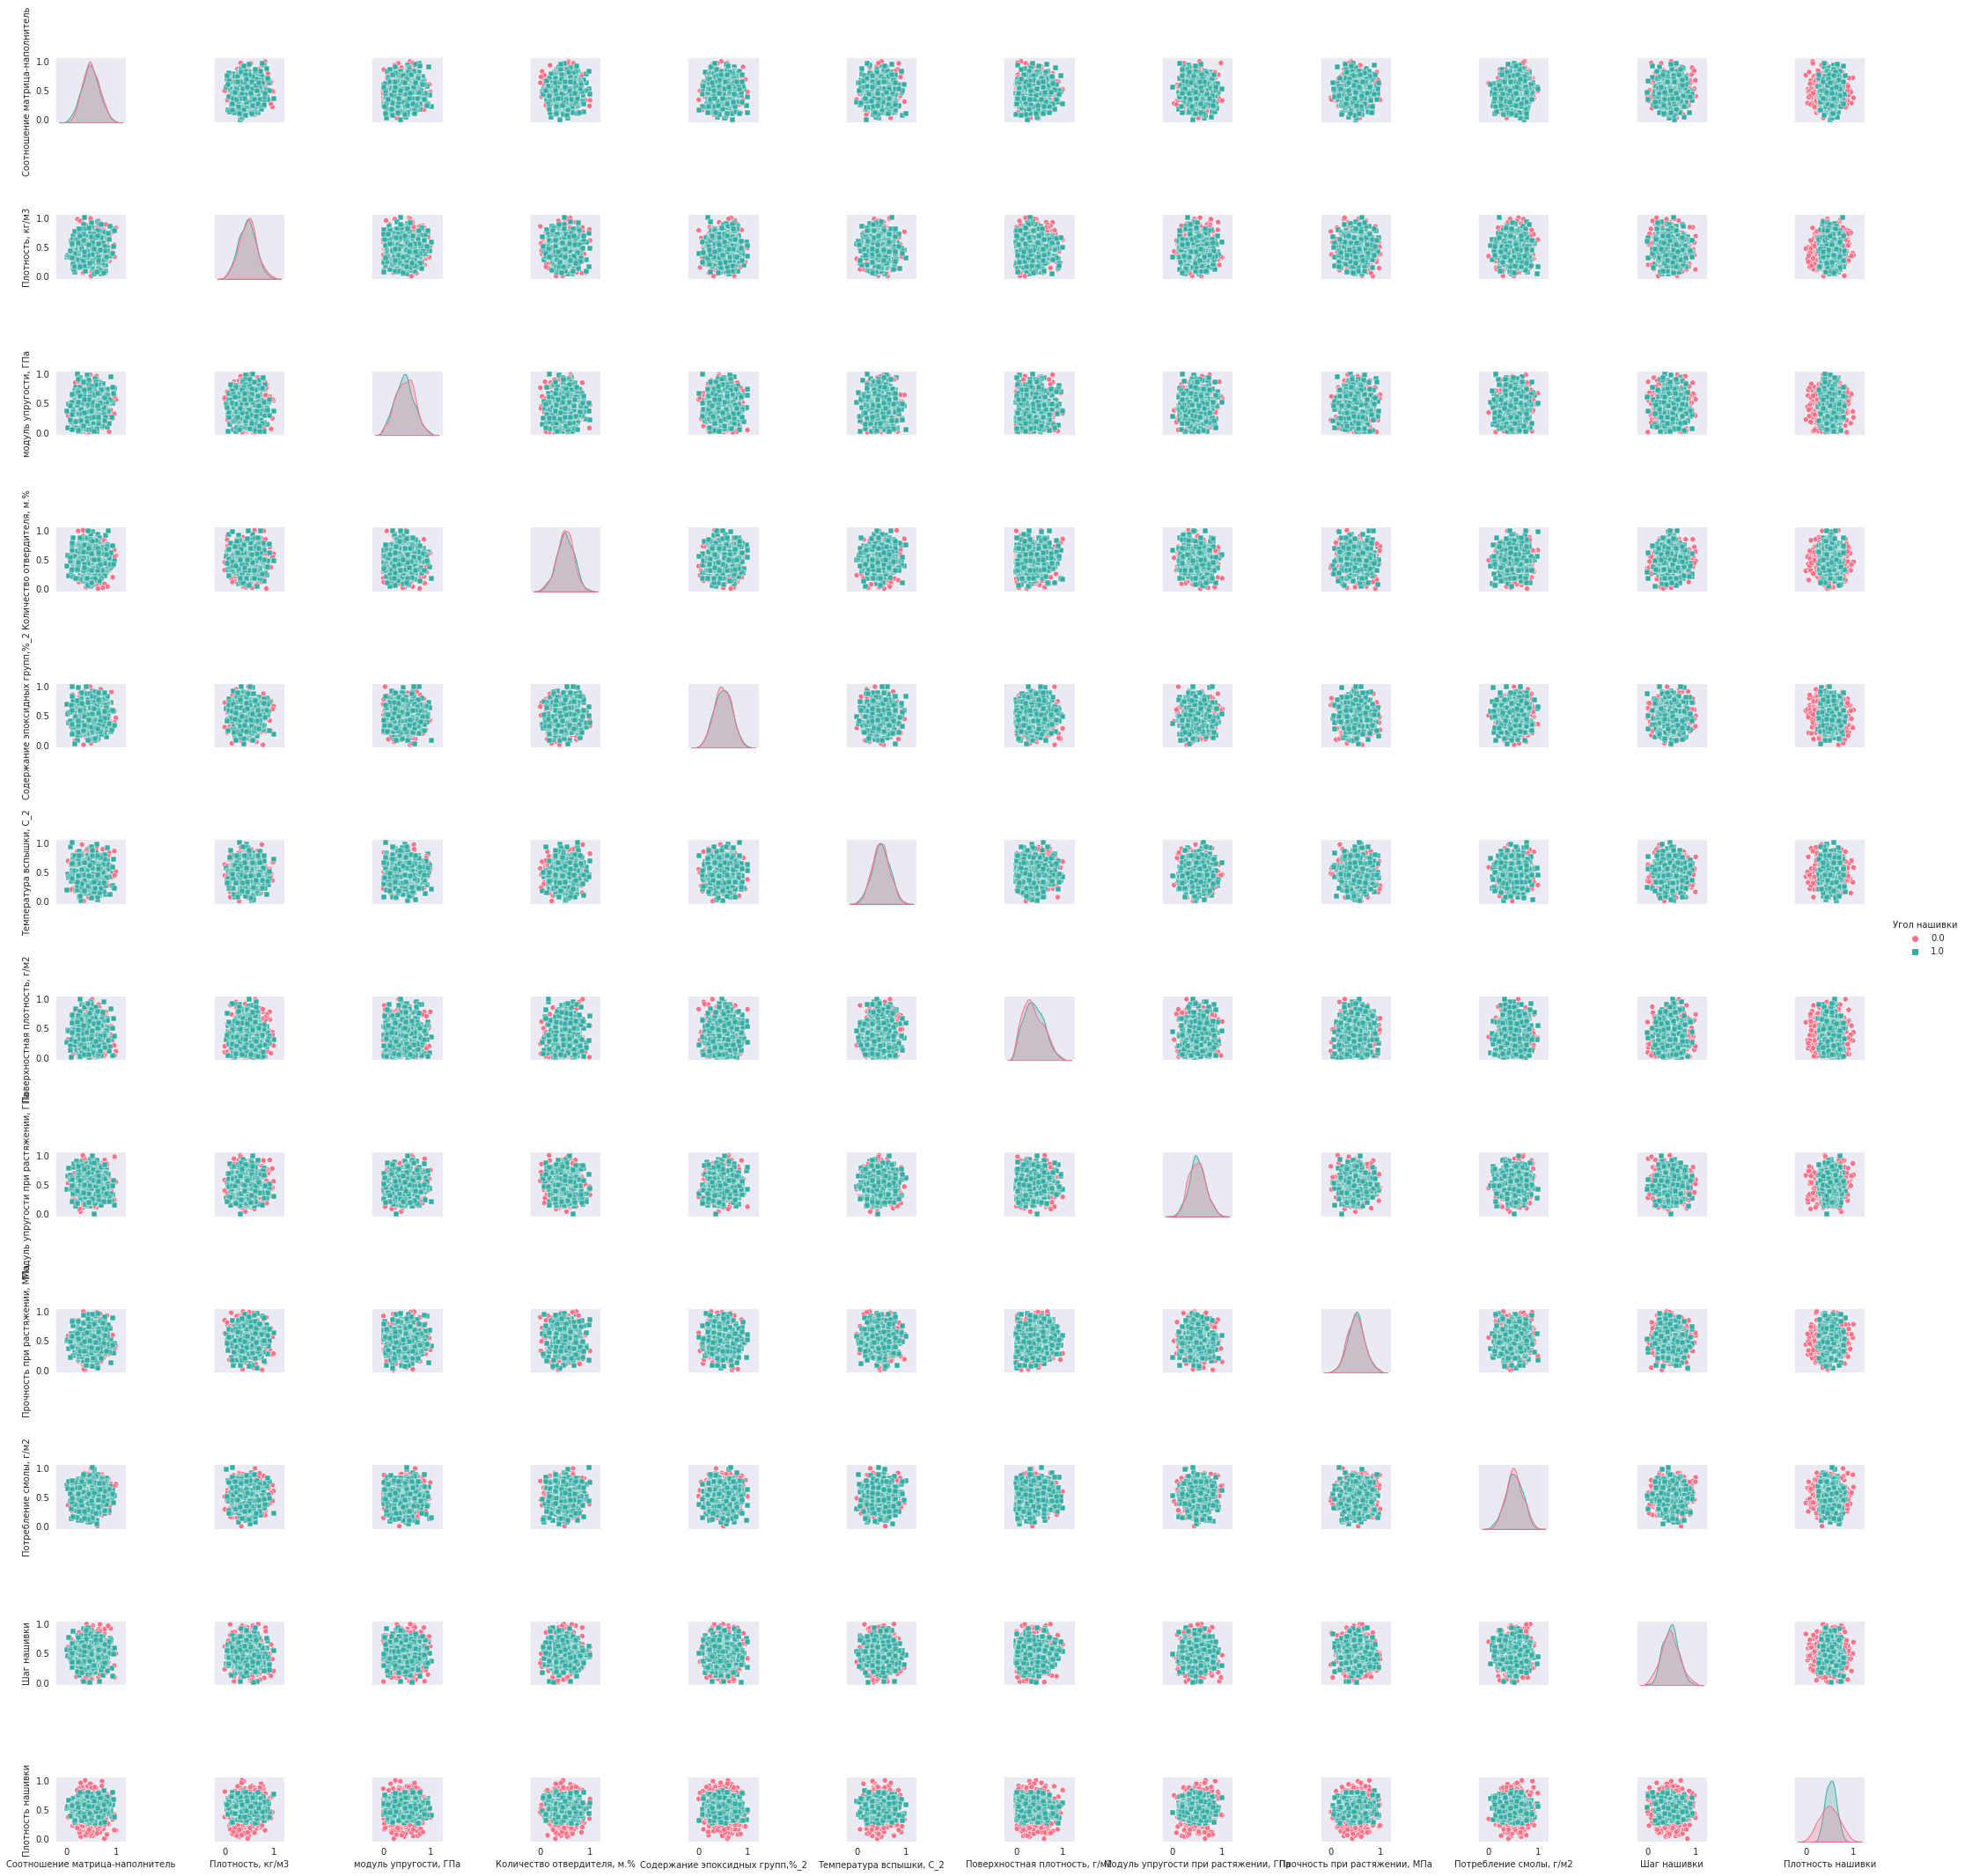

In [53]:
sns.pairplot(df_minmax_n, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette = 'husl')

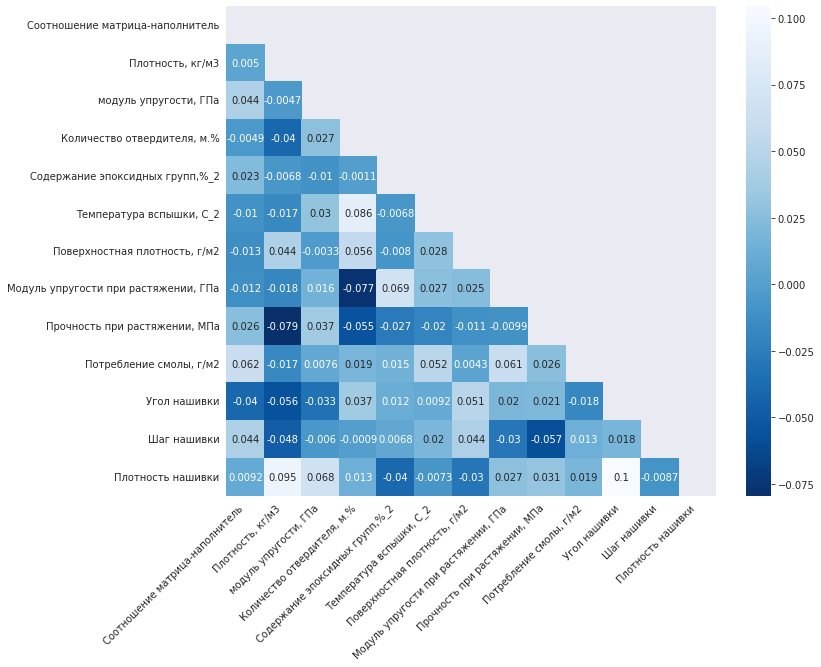

In [54]:
mask = np.triu(df_minmax_n.corr())
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(df_minmax_n.corr(), mask = mask, annot = True, square = True, cmap = 'Blues_r')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [55]:
# Нормализуем данные с помощью Normalizer()

normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
df_norm_n

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.000499          0.545436               0.198490   
1                           0.000499          0.545011               0.198335   
2                           0.000744          0.544829               0.202097   
3                           0.000746          0.539271               0.201687   
4                           0.000699          0.519919               0.219673   
..                               ...               ...                    ...   
995                         0.000700          0.601751               0.281397   
996                         0.001078          0.641795               0.139227   
997                         0.000953          0.573123               0.121122   
998                         0.001192          0.664667               0.238453   
999                         0.001071          0.531728               0.117381   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.013434                         0.006381   
1                       0.034634                         0.005705   
2                       0.030022                         0.005976   
3                       0.030161                         0.006004   
4                       0.030449                         0.006062   
..                           ...                              ...   
995                     0.026816                         0.006203   
996                     0.045701                         0.006136   
997                     0.032118                         0.006961   
998                     0.045473                         0.006190   
999                     0.036336                         0.007728   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.076473                       0.056424   
1                    0.080543                       0.056380   
2                    0.076388                       0.056362   
3                    0.076742                       0.056623   
4                    0.077475                       0.057164   
..                        ...                            ...   
995                  0.100115                       0.064488   
996                  0.079584                       0.109777   
997                  0.072186                       0.215067   
998                  0.088689                       0.206291   
999                  0.084651                       0.213418   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.018808                       0.806064   
1                                0.018793                       0.805435   
2                                0.018787                       0.805167   
3                                0.018874                       0.808906   
4                                0.019055                       0.816627   
..                                    ...                            ...   
995                              0.022531                       0.735908   
996                              0.022828                       0.738938   
997                              0.021716                       0.773775   
998                              0.023812                       0.666248   
999                              0.020902                       0.803417   

     Потребление смолы, г/м2  Угол нашивки  Шаг нашивки  Плотность нашивки  
0                   0.059111      0.000000     0.001075           0.016121  
1                   0.059065      0.000000     0.001342           0.012618  
2                   0.059046      0.000000     0.001342           0.015298  
3                   0.059320      0.000000     0.001348           0.016178  
4                   0.059886      0.000000     0.001361           0.019055  
..                       ...           ...          ...    

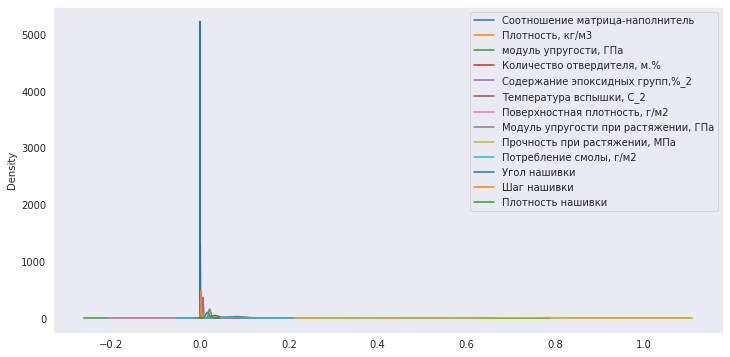

In [56]:
fig, ax = plt.subplots(figsize = (12, 6))
df_norm_n.plot(kind = 'kde', ax = ax)

In [57]:
#Сравним с данными до нормализации
df.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                         50.00                        23.750000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6                 284.615385                          210.0   
7                 284.615385                          380.0   
8                 300.000000                          380.0   
9                 300.000000                         1010.0   
10                300.000000                         1010.0   
11                300.000000                         1010.0   

    Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                   70.0                         3000.0   
3                                   70.0                         3000.0   
4                                   70.0                         3000.0   
5                                   70.0                         3000.0   
6                                   70.0                         3000.0   
7                                   75.0                         1800.0   
8                                   75.0                         1800.0   
9                                   78.0                         2000.0   
10                                  78.0                         2000.0   
11                                  78.0                         2000.0   

    Потребление смолы, г/м2  Угол нашивки  Шаг нашивки  Плотность нашивки  
1                     220.0             0          4.0               60.0  
3                     220.0             0          5.0               47.0  
4                     220.0             0          5.0               57.0  
5                     220.0             0          5.0               60.0  
6                     220.0             0          5.0               70.0  
7                     120.0             0          7.0               47.0  
8                     120.0             0          7.0               57.0  
9                     300.0             0          7.0               60.0  
10                    300.0             0          7.0               70.0  
11                    300.0             0          9.0               47.0

In [58]:
# Проверим перевод данных из нормализованных в исходные
col = df_minmax_n.columns
result_reverse = scaler.inverse_transform(df_minmax_n)
initial_data = pd.DataFrame(result_reverse, columns = col)
initial_data.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         2.771331            2030.0             753.000000   
3                         2.767918            2000.0             748.000000   
4                         2.569620            1910.0             807.000000   
5                         2.561475            1900.0             535.000000   
6                         3.557018            1930.0             889.000000   
7                         3.532338            2100.0            1421.000000   
8                         2.919678            2160.0             933.000000   
9                         2.877358            1990.0            1628.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        50.00                        23.750000   
1                       129.00                        21.250000   
2                       111.86                        22.267857   
3                       111.86                        22.267857   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       129.00                        21.250000   
7                       129.00                        21.250000   
8                       129.00                        21.250000   
9                       129.00                        21.250000   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                284.615385                          210.0   
1                300.000000                          210.0   
2                284.615385                          210.0   
3                284.615385                          210.0   
4                284.615385                          210.0   
5                284.615385                          380.0   
6                300.000000                          380.0   
7                300.000000                         1010.0   
8                300.000000                         1010.0   
9                300.000000                         1010.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  75.0                         1800.0   
6                                  75.0                         1800.0   
7                                  78.0                         2000.0   
8                                  78.0                         2000.0   
9                                  78.0                         2000.0   

   Потребление смолы, г/м2  Угол нашивки  Шаг нашивки  Плотность нашивки  
0                    220.0           0.0          4.0               60.0  
1                    220.0           0.0          5.0               47.0  
2                    220.0           0.0          5.0               57.0  
3                    220.0           0.0          5.0               60.0  
4                    220.0           0.0          5.0               70.0  
5                    120.0           0.0          7.0               47.0  
6                    120.0           0.0          7.0               57.0  
7                    300.0           0.0          7.0               60.0  
8                    300.0           0.0          7.0               70.0  
9                    300.0           0.0          9.0               47.0

In [59]:
# Рассмотрим несколько вариантов корреляции между параметрами после нормализации (вариант 1)
df_norm_n[df_norm_n.columns].corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.293553   
модуль упругости, ГПа                                        0.035700   
Количество отвердителя, м.%                                  0.132567   
Содержание эпоксидных групп,%_2                              0.236978   
Температура вспышки, С_2                                     0.193216   
Поверхностная плотность, г/м2                                0.003644   
Модуль упругости при растяжении, ГПа                         0.279652   
Прочность при растяжении, МПа                               -0.262671   
Потребление смолы, г/м2                                      0.152608   
Угол нашивки                                                -0.014667   
Шаг нашивки                                                  0.146504   
Плотность нашивки                                            0.142353   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.293553               0.035700   
Плотность, кг/м3                              1.000000              -0.018367   
модуль упругости, ГПа                        -0.018367               1.000000   
Количество отвердителя, м.%                   0.391573               0.042861   
Содержание эпоксидных групп,%_2               0.685700              -0.009715   
Температура вспышки, С_2                      0.585623               0.014160   
Поверхностная плотность, г/м2                 0.064199              -0.019967   
Модуль упругости при растяжении, ГПа          0.881792              -0.001925   
Прочность при растяжении, МПа                -0.856081              -0.383687   
Потребление смолы, г/м2                       0.317734              -0.004129   
Угол нашивки                                  0.076298              -0.039030   
Шаг нашивки                                   0.303750              -0.004627   
Плотность нашивки                             0.431254               0.046034   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.132567   
Плотность, кг/м3                                         0.391573   
модуль упругости, ГПа                                    0.042861   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.304342   
Температура вспышки, С_2                                 0.328660   
Поверхностная плотность, г/м2                            0.076057   
Модуль упругости при растяжении, ГПа                     0.364811   
Прочность при растяжении, МПа                           -0.379266   
Потребление смолы, г/м2                                  0.178696   
Угол нашивки                                             0.065162   
Шаг нашивки                                              0.138104   
Плотность нашивки                                        0.200320   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.236978   
Плотность, кг/м3                                             0.685700   
модуль упругости, ГПа                                       -0.009715   
Количество отвердителя, м.%                                  0.304342   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                     0.442769   
Поверхностная плотность, г/м2                                0.039988   
Модуль упругости при растяжении, ГПа                         0.692203   
Прочность при растяжении, МПа                               -0.593916   
Потребление смолы, г/м2                                      0.258257   
Угол нашивки                                                 0.082431   
Шаг нашивки                          

In [60]:
# Рассмотрим второй вариант корреляции между параметрами после нормализации (вариант 2)
df_minmax_n[df_minmax_n.columns].corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.004992   
модуль упругости, ГПа                                        0.043882   
Количество отвердителя, м.%                                 -0.004923   
Содержание эпоксидных групп,%_2                              0.022868   
Температура вспышки, С_2                                    -0.010440   
Поверхностная плотность, г/м2                               -0.013341   
Модуль упругости при растяжении, ГПа                        -0.012219   
Прочность при растяжении, МПа                                0.025619   
Потребление смолы, г/м2                                      0.061553   
Угол нашивки                                                -0.040429   
Шаг нашивки                                                  0.043621   
Плотность нашивки                                            0.009227   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.004992               0.043882   
Плотность, кг/м3                              1.000000              -0.004677   
модуль упругости, ГПа                        -0.004677               1.000000   
Количество отвердителя, м.%                  -0.039992               0.027359   
Содержание эпоксидных групп,%_2              -0.006781              -0.010107   
Температура вспышки, С_2                     -0.016638               0.030221   
Поверхностная плотность, г/м2                 0.044108              -0.003296   
Модуль упругости при растяжении, ГПа         -0.018448               0.015797   
Прочность при растяжении, МПа                -0.079407               0.037033   
Потребление смолы, г/м2                      -0.017481               0.007556   
Угол нашивки                                 -0.055865              -0.032754   
Шаг нашивки                                  -0.047734              -0.006022   
Плотность нашивки                             0.094659               0.067535   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.004923   
Плотность, кг/м3                                        -0.039992   
модуль упругости, ГПа                                    0.027359   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.001135   
Температура вспышки, С_2                                 0.086055   
Поверхностная плотность, г/м2                            0.055783   
Модуль упругости при растяжении, ГПа                    -0.076542   
Прочность при растяжении, МПа                           -0.055299   
Потребление смолы, г/м2                                  0.019433   
Угол нашивки                                             0.037052   
Шаг нашивки                                             -0.000902   
Плотность нашивки                                        0.013256   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.022868   
Плотность, кг/м3                                            -0.006781   
модуль упругости, ГПа                                       -0.010107   
Количество отвердителя, м.%                                 -0.001135   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.006799   
Поверхностная плотность, г/м2                               -0.008031   
Модуль упругости при растяжении, ГПа                         0.069029   
Прочность при растяжении, МПа                               -0.027217   
Потребление смолы, г/м2                                      0.015326   
Угол нашивки                                                 0.012099   
Шаг нашивки                          

In [61]:
df_minmax_n

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.282131          0.601381               0.447061   
1                           0.282131          0.601381               0.447061   
2                           0.457857          0.601381               0.455721   
3                           0.457201          0.527898               0.452685   
4                           0.419084          0.307448               0.488508   
..                               ...               ...                    ...   
995                         0.361750          0.410540               0.552781   
996                         0.587163          0.650588               0.268550   
997                         0.555750          0.460227               0.251612   
998                         0.637396          0.691520               0.448724   
999                         0.657131          0.259472               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.123047                         0.607435   
1                       0.608021                         0.418887   
2                       0.502800                         0.495653   
3                       0.502800                         0.495653   
4                       0.502800                         0.495653   
..                           ...                              ...   
995                     0.350139                         0.333908   
996                     0.712271                         0.294428   
997                     0.494656                         0.623085   
998                     0.684130                         0.267818   
999                     0.609147                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.482823                       0.162230   
1                    0.549664                       0.162230   
2                    0.482823                       0.162230   
3                    0.482823                       0.162230   
4                    0.482823                       0.162230   
..                        ...                            ...   
995                  0.657301                       0.161609   
996                  0.350746                       0.271207   
997                  0.325580                       0.572959   
998                  0.444436                       0.496511   
999                  0.553803                       0.587373   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.319194                       0.698235   
1                                0.319194                       0.698235   
2                                0.319194                       0.698235   
3                                0.319194                       0.698235   
4                                0.319194                       0.698235   
..                                    ...                            ...   
995                              0.485125                       0.480312   
996                              0.475992                       0.470745   
997                              0.573346                       0.578340   
998                              0.536217                       0.368070   
999                              0.550550                       0.647135   

     Потребление смолы, г/м2  Угол нашивки  Шаг нашивки  Плотность нашивки  
0                   0.517418           0.0     0.275109           0.544652  
1                   0.517418           0.0     0.344539           0.365074  
2                   0.517418           0.0     0.344539           0.503211  
3                   0.517418           0.0     0.344539           0.544652  
4                   0.517418           0.0     0.344539           0.682789  
..                       ...           ...          ...    

In [62]:
df_norm_n

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.000499          0.545436               0.198490   
1                           0.000499          0.545011               0.198335   
2                           0.000744          0.544829               0.202097   
3                           0.000746          0.539271               0.201687   
4                           0.000699          0.519919               0.219673   
..                               ...               ...                    ...   
995                         0.000700          0.601751               0.281397   
996                         0.001078          0.641795               0.139227   
997                         0.000953          0.573123               0.121122   
998                         0.001192          0.664667               0.238453   
999                         0.001071          0.531728               0.117381   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.013434                         0.006381   
1                       0.034634                         0.005705   
2                       0.030022                         0.005976   
3                       0.030161                         0.006004   
4                       0.030449                         0.006062   
..                           ...                              ...   
995                     0.026816                         0.006203   
996                     0.045701                         0.006136   
997                     0.032118                         0.006961   
998                     0.045473                         0.006190   
999                     0.036336                         0.007728   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.076473                       0.056424   
1                    0.080543                       0.056380   
2                    0.076388                       0.056362   
3                    0.076742                       0.056623   
4                    0.077475                       0.057164   
..                        ...                            ...   
995                  0.100115                       0.064488   
996                  0.079584                       0.109777   
997                  0.072186                       0.215067   
998                  0.088689                       0.206291   
999                  0.084651                       0.213418   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.018808                       0.806064   
1                                0.018793                       0.805435   
2                                0.018787                       0.805167   
3                                0.018874                       0.808906   
4                                0.019055                       0.816627   
..                                    ...                            ...   
995                              0.022531                       0.735908   
996                              0.022828                       0.738938   
997                              0.021716                       0.773775   
998                              0.023812                       0.666248   
999                              0.020902                       0.803417   

     Потребление смолы, г/м2  Угол нашивки  Шаг нашивки  Плотность нашивки  
0                   0.059111      0.000000     0.001075           0.016121  
1                   0.059065      0.000000     0.001342           0.012618  
2                   0.059046      0.000000     0.001342           0.015298  
3                   0.059320      0.000000     0.001348           0.016178  
4                   0.059886      0.000000     0.001361           0.019055  
..                       ...           ...          ...    

In [63]:
# Стандартизируем данные
X1 = df_minmax_n.copy()
X2 = df_norm_n.copy()

In [64]:
df_std_X1 = preprocessing.StandardScaler().fit(X1)
df_standart_X1 = df_std_X1.transform(X1)
df_standart_1 = pd.DataFrame(df_standart_X1)

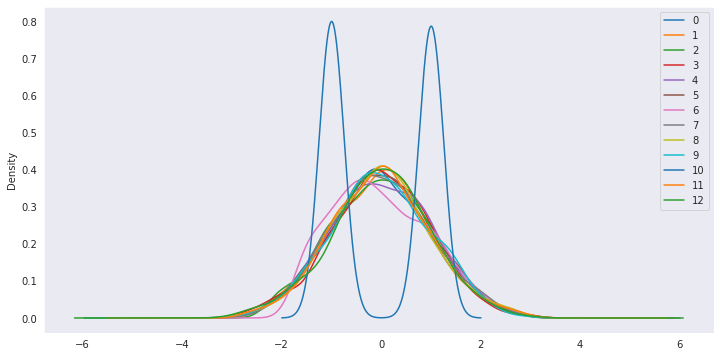

In [65]:
fig, ax = plt.subplots(figsize = (12, 6))
df_standart_1.plot(kind = 'kde', ax = ax)

In [66]:
df_standart_1

0         1         2         3         4         5         6   \
0   -1.188074  0.748760  0.000187 -2.183465  0.635509 -0.033372 -0.972209   
1   -1.188074  0.748760  0.000187  0.652581 -0.413566  0.349222 -0.972209   
2   -0.181618  0.748760  0.043755  0.037267  0.013557 -0.033372 -0.972209   
3   -0.185375  0.337335  0.028482  0.037267  0.013557 -0.033372 -0.972209   
4   -0.403687 -0.896941  0.208700  0.037267  0.013557 -0.033372 -0.972209   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.732065 -0.319740  0.532040 -0.855471 -0.886384  0.965330 -0.975096   
996  0.558967  1.024267 -0.897860  1.262223 -1.106052 -0.789376 -0.465451   
997  0.379056 -0.041549 -0.983070 -0.010354  0.722583 -0.933423  0.937736   
998  0.846671  1.253439  0.008553  1.097660 -1.254107 -0.253099  0.582241   
999  0.959702 -1.165555 -0.981605  0.659166  2.198530  0.372914  1.004764   

           7         8         9         10        11        12  
0   -1.066163  1.103890  0.029635 -0.992032 -1.138524  0.230045  
1   -1.066163  1.103890  0.029635 -0.992032 -0.747359 -0.867940  
2   -1.066163  1.103890  0.029635 -0.992032 -0.747359 -0.023336  
3   -1.066163  1.103890  0.029635 -0.992032 -0.747359  0.230045  
4   -1.066163  1.103890  0.029635 -0.992032 -0.747359  1.074650  
..        ...       ...       ...       ...       ...       ...  
995 -0.073007 -0.160017 -1.582714  1.008032  0.847177 -0.866270  
996 -0.127673 -0.215506 -1.706239  1.008032  1.429712 -0.297765  
997  0.455028  0.408525  0.311510  1.008032 -1.075486  0.874452  
998  0.232799 -0.810995 -0.358614  1.008032 -0.233681  0.083175  
999  0.318587  0.807522 -0.398871  1.008032 -0.325331  1.702568  

[1000 rows x 13 columns]

In [67]:
df_std_X2 = preprocessing.StandardScaler().fit(X2)
df_standart_X2 = df_std_X2.transform(X2)
df_standart_2 = pd.DataFrame(df_standart_X2)

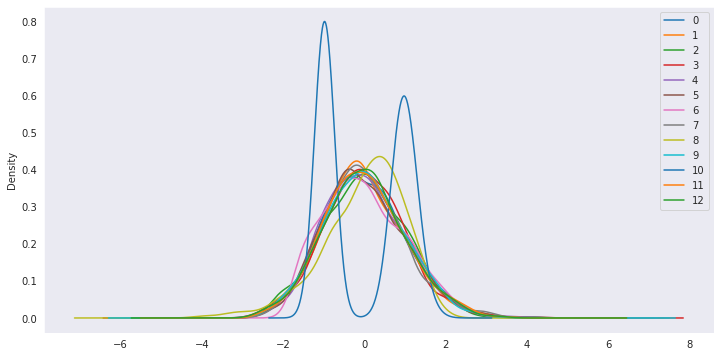

In [68]:
fig, ax = plt.subplots(figsize = (12, 6))
df_standart_2.plot(kind = 'kde', ax=ax)

In [69]:
df_standart_2

0         1         2         3         4         5         6   \
0   -1.331247 -0.757988 -0.232219 -2.153460 -0.328428 -0.644046 -1.053318   
1   -1.332582 -0.764204 -0.233835  0.116027 -0.970619 -0.382348 -1.053848   
2   -0.491726 -0.766855 -0.194589 -0.377679 -0.712971 -0.649518 -1.054074   
3   -0.483036 -0.848058 -0.198862 -0.362753 -0.686610 -0.626711 -1.050925   
4   -0.643719 -1.130748 -0.011238 -0.331934 -0.632182 -0.579622 -1.044423   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.641344  0.064668  0.632676 -0.720868 -0.497611  0.875860 -0.956313   
996  0.654995  0.649631 -0.850452  1.300804 -0.561579 -0.444033 -0.411458   
997  0.226620 -0.353540 -1.039317 -0.153258  0.222539 -0.919652  0.855245   
998  1.044015  0.983751  0.184680  1.276377 -0.510458  0.141288  0.749666   
999  0.630744 -0.958245 -1.078347  0.298287  0.950544 -0.118303  0.835398   

           7         8         9         10        11        12  
0   -1.278980  1.030774 -0.357717 -0.979970 -1.233455 -0.295450  
1   -1.284555  1.022243 -0.360134 -0.979970 -0.909822 -1.171227  
2   -1.286932  1.018605 -0.361164 -0.979970 -0.910362 -0.501246  
3   -1.253787  1.069329 -0.346797 -0.979970 -0.902826 -0.281238  
4   -1.185352  1.174061 -0.317132 -0.979970 -0.887266  0.437952  
..        ...       ...       ...       ...       ...       ...  
995  0.135253  0.079114 -1.435797  1.035447  0.850187 -0.702221  
996  0.248203  0.120217 -1.523749  1.066808  1.466586 -0.118986  
997 -0.174380  0.592779  0.147400  0.919821 -1.070964  0.587190  
998  0.621694 -0.865811 -0.133317  1.122612 -0.078019  0.358371  
999 -0.483760  0.994866 -0.584669  0.859021 -0.465487  1.119470  

[1000 rows x 13 columns]

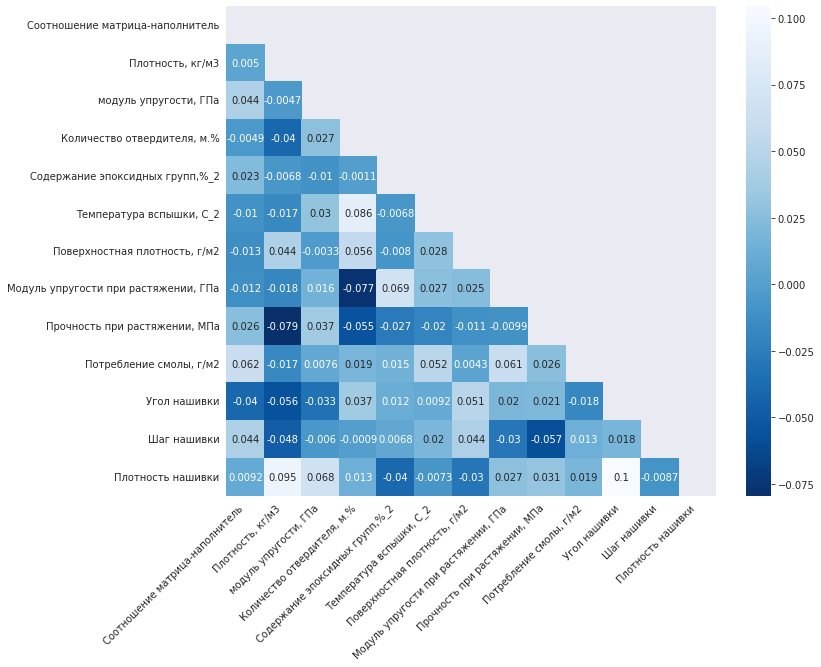

In [70]:
mask = np.triu(X1.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(X1.corr(), mask=mask, annot=True, square=True, cmap='Blues_r')
plt.xticks(rotation=45, ha='right')
plt.show()

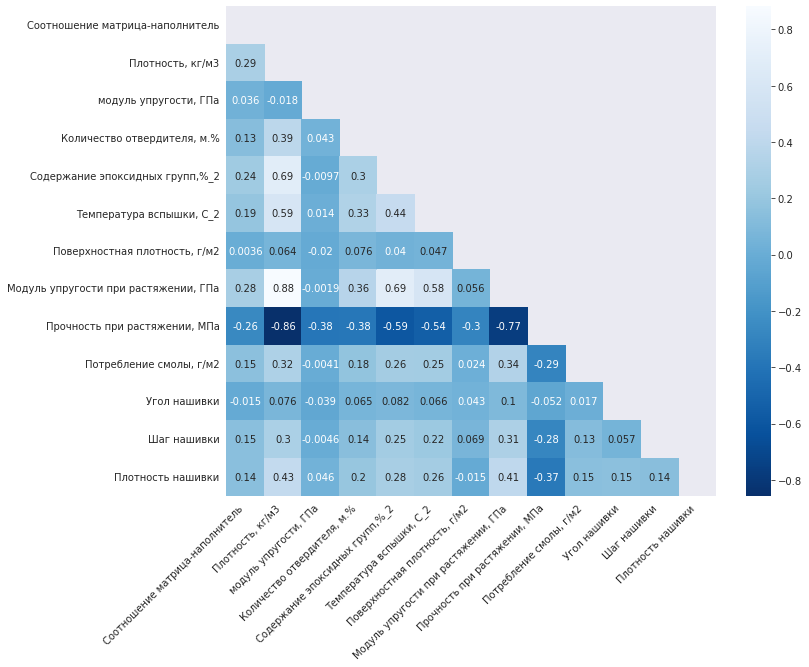

In [71]:
mask = np.triu(X2.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(X2.corr(), mask=mask, annot=True, square=True, cmap='Blues_r')
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
df_norm_n.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1000.000000       1000.000000   
mean                          0.000887          0.597325   
std                           0.000292          0.068489   
min                           0.000121          0.420442   
25%                           0.000681          0.551343   
50%                           0.000871          0.591994   
75%                           0.001072          0.641625   
max                           0.001924          0.874455   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1000.000000                  1000.000000   
mean                0.220750                     0.033550   
std                 0.095907                     0.009346   
min                 0.000709                     0.006835   
25%                 0.151018                     0.027488   
50%                 0.220845                     0.033403   
75%                 0.290834                     0.039520   
max                 0.525102                     0.073492   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1000.000000               1000.000000   
mean                          0.006727                  0.086491   
std                           0.001053                  0.015563   
min                           0.004051                  0.049282   
25%                           0.005971                  0.075843   
50%                           0.006658                  0.084982   
75%                           0.007417                  0.096587   
max                           0.010887                  0.147961   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1000.000000                           1000.000000   
mean                        0.143978                              0.022175   
std                         0.083163                              0.002634   
min                         0.000230                              0.015231   
25%                         0.080878                              0.020368   
50%                         0.137985                              0.021964   
75%                         0.201791                              0.023815   
max                         0.414371                              0.033015   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                    1000.000000              1000.000000   1000.000000   
mean                        0.730076                 0.065939      0.000150   
std                         0.073756                 0.019096      0.000153   
min                         0.430381                 0.012335      0.000000   
25%                         0.686951                 0.052679      0.000000   
50%                         0.740789                 0.065513      0.000000   
75%                         0.781473                 0.078205      0.000299   
max                         0.882446                 0.145392      0.000419   

       Шаг нашивки  Плотность нашивки  
count  1000.000000        1000.000000  
mean      0.002095           0.017303  
std       0.000827           0.004002  
min       0.000011           0.006551  
25%       0.001515           0.014661  
50%       0.002046           0.017229  
75%       0.002628           0.019779  
max       0.004953           0.030927

In [73]:
df_minmax_n.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1000.000000       1000.000000   
mean                          0.489568          0.467648   
std                           0.174687          0.178696   
min                           0.000000          0.000000   
25%                           0.370964          0.340831   
50%                           0.484284          0.472347   
75%                           0.608289          0.579727   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1000.000000                  1000.000000   
mean                0.447024                     0.496427   
std                 0.198876                     0.171089   
min                 0.000000                     0.000000   
25%                 0.302576                     0.384097   
50%                 0.448525                     0.495388   
75%                 0.582408                     0.613258   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1000.000000               1000.000000   
mean                          0.493216                  0.488654   
std                           0.179818                  0.174792   
min                           0.000000                  0.000000   
25%                           0.368597                  0.371985   
50%                           0.492154                  0.488205   
75%                           0.624396                  0.606271   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1000.000000                           1000.000000   
mean                        0.371301                              0.497322   
std                         0.215155                              0.167158   
min                         0.000000                              0.000000   
25%                         0.206374                              0.386234   
50%                         0.348844                              0.492609   
75%                         0.535295                              0.605138   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                    1000.000000              1000.000000   1000.000000   
mean                        0.507902                 0.512370      0.496000   
std                         0.172506                 0.170432      0.500234   
min                         0.000000                 0.000000      0.000000   
25%                         0.390414                 0.401220      0.000000   
50%                         0.504890                 0.513653      0.000000   
75%                         0.612932                 0.625772      1.000000   
max                         1.000000                 1.000000      1.000000   

       Шаг нашивки  Плотность нашивки  
count  1000.000000        1000.000000  
mean      0.477193           0.507027  
std       0.177586           0.163634  
min       0.000000           0.000000  
25%       0.351886           0.405037  
50%       0.477999           0.509730  
75%       0.593714           0.612766  
max       1.000000           1.000000

# Разработка и обучение моделей для прогноза прочности при растяжении

In [74]:
x_upr = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

In [75]:
# Метод ближайших соседей
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 199, 'weights': 'uniform'}

In [76]:
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: 0.003


In [77]:
models = pd.DataFrame()

In [78]:
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [79]:
models = pd.concat([models, knr_upr_result])

In [80]:
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'auto', 'n_neighbors': 247, 'weights': 'uniform'}

In [81]:
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: -0.015


In [82]:
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [83]:
models = pd.concat([models, knr_pr_result])

In [84]:
# Метод линейной регрессии
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [85]:
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.014


In [86]:
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [87]:
models = pd.concat([models, lr_upr_result])

In [88]:
#Метод случайный лес
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 980,
 'min_samples_split': 45,
 'min_samples_leaf': 5,
 'max_depth': 2,
 'criterion': 'squared_error',
 'bootstrap': 'True'}

In [89]:
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.003


In [90]:
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [91]:
models = pd.concat([models, rfr_upr_result])

In [92]:
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 280,
 'min_samples_split': 45,
 'min_samples_leaf': 6,
 'max_depth': 2,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [93]:
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: -0.008


In [94]:
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [95]:
models = pd.concat([models, rfr_pr_result])

Модели не справляются с решением поставленной задачи, попробуем с помощью многослойного перцептрона

In [96]:
mlpr = MLPRegressor(random_state=2)
mlpr_params = {
    'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [97]:
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_mlpr_upr.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (12, 12, 12, 12, 12),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [98]:
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score MLPR для модуля упругости при растяжении: -0.003


In [99]:
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [100]:
models = pd.concat([models, mlpr_upr_result])

In [101]:
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_mlpr_pr.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (16, 16, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [102]:
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score MLPR для прочности при растяжении: -0.006


In [103]:
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [104]:
models = pd.concat([models, mlpr_pr_result])

In [105]:
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

Model         MAE  \
Модуль упругости при растяжении  RandomForestRegressor_upr    2.444164   
Модуль упругости при растяжении    KNeighborsRegressor_upr    2.448427   
Модуль упругости при растяжении           MLPRegressor_upr    2.455757   
Модуль упругости при растяжении       LinearRegression_upr    2.464385   
Прочность при растяжении                   MLPRegressor_pr  409.292347   
Прочность при растяжении          RandomForestRegressor_pr  410.345260   
Прочность при растяжении            KNeighborsRegressor_pr  411.118179   

                                 R2 score  
Модуль упругости при растяжении    -0.003  
Модуль упругости при растяжении     0.003  
Модуль упругости при растяжении    -0.003  
Модуль упругости при растяжении    -0.014  
Прочность при растяжении           -0.006  
Прочность при растяжении           -0.008  
Прочность при растяжении           -0.015

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа')

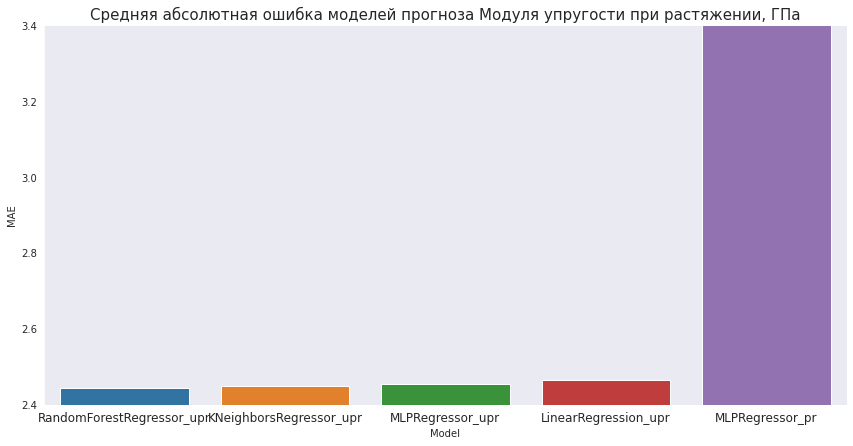

In [106]:
sns.catplot(data=models_sort[0:5], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=2.4, ymax=3.4)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа', size=15)

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа')

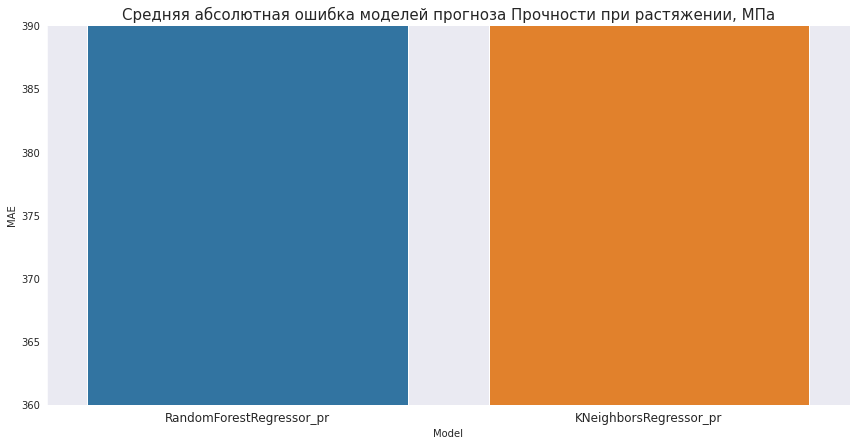

In [107]:
sns.catplot(data=models_sort[5:10], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=360, ymax=390)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа', size=15)

# Построение нейронной сети для прогнозирования Модуля упругости при растяжении

In [108]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [109]:
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

In [110]:
model_upr = Sequential(X_train_upr_norm)

model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [111]:
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [112]:
%%time
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
9/9 [==============================] - 2s 42ms/step - loss: 72.8151 - val_loss: 63.4919
Epoch 2/40
9/9 [==============================] - 0s 10ms/step - loss: 70.6363 - val_loss: 73.4290
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 65.9317 - val_loss: 73.9356
Epoch 4/40
9/9 [==============================] - 0s 7ms/step - loss: 54.5698 - val_loss: 60.9882
Epoch 5/40
9/9 [==============================] - 0s 7ms/step - loss: 30.6824 - val_loss: 74.1501
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 15.3309 - val_loss: 71.9952
Epoch 7/40
9/9 [==============================] - 0s 7ms/step - loss: 6.0389 - val_loss: 7188.0933
Epoch 8/40
9/9 [==============================] - 0s 10ms/step - loss: 4.1254 - val_loss: 7198.8428
Epoch 9/40
9/9 [==============================] - 0s 7ms/step - loss: 3.7560 - val_loss: 3212.2522
Epoch 10/40
9/9 [==============================] - 0s 7ms/step - loss: 3.2086 - val_loss: 1314.8085
Epoch 11/40


In [113]:
model_upr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [114]:
# Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

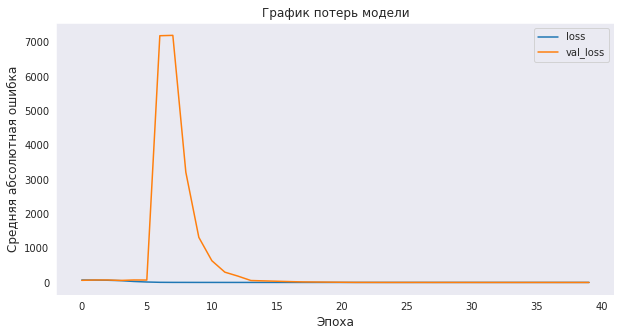

In [115]:
model_loss_plot(history_upr)

In [116]:
# Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

10/10 [==============================] - 0s 2ms/step


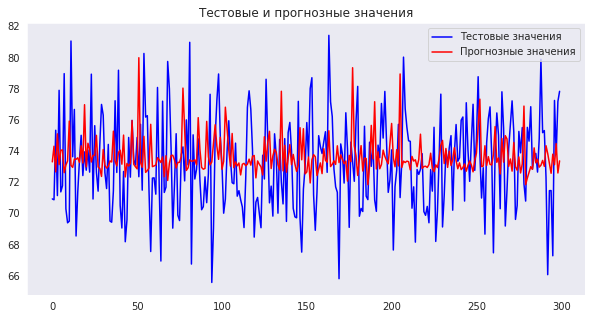

In [117]:
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

In [118]:
# Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

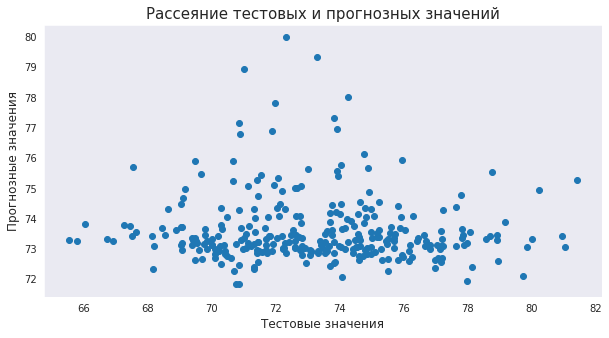

In [119]:
actual_and_predicted_scatter(original_upr, predicted_upr)

In [120]:
print(f'Model MAE: {model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)}')

10/10 [==============================] - 0s 3ms/step - loss: 2.6912
Model MAE: 2.6911559104919434


In [121]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    2.45255
dtype: float64


# Построение нейронной сети для прогнозирования Прочности при растяжении 

In [122]:
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

In [123]:
model_pr = Sequential(X_train_pr_norm)

model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [124]:
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [125]:
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [126]:
%%time
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
18/18 [==============================] - 2s 18ms/step - loss: 2486.2078 - val_loss: 2424.7102
Epoch 2/300
18/18 [==============================] - 0s 5ms/step - loss: 2485.1099 - val_loss: 2427.4580
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 2484.1162 - val_loss: 2429.7644
Epoch 4/300
18/18 [==============================] - 0s 5ms/step - loss: 2483.0022 - val_loss: 2433.3684
Epoch 5/300
18/18 [==============================] - 0s 5ms/step - loss: 2481.5457 - val_loss: 2432.5254
Epoch 6/300
18/18 [==============================] - 0s 5ms/step - loss: 2479.7871 - val_loss: 2429.8989
Epoch 7/300
18/18 [==============================] - 0s 4ms/step - loss: 2477.4497 - val_loss: 2429.5811
Epoch 8/300
18/18 [==============================] - 0s 4ms/step - loss: 2474.3169 - val_loss: 2431.0977
Epoch 9/300
18/18 [==============================] - 0s 5ms/step - loss: 2469.9663 - val_loss: 2438.4890
Epoch 10/300
18/18 [==============================] - 

In [127]:
model_pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)               

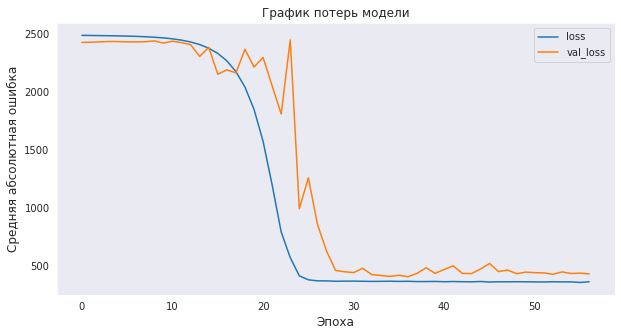

In [128]:
model_loss_plot(history_pr)

10/10 [==============================] - 0s 2ms/step


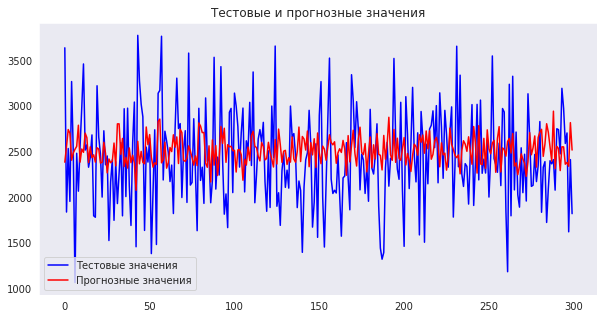

In [129]:
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

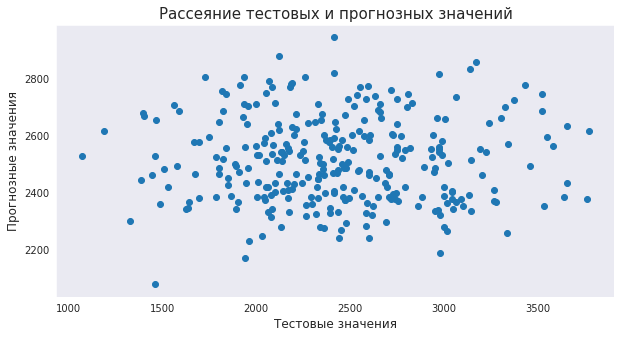

In [130]:
actual_and_predicted_scatter(original_pr, predicted_pr)

In [131]:
print(f'Model MAE: {model_pr.evaluate(X_test_pr, y_test_pr)}')

10/10 [==============================] - 0s 2ms/step - loss: 433.5201
Model MAE: 433.5201110839844


In [132]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    405.896013
dtype: float64


# Построение нейронной сети для прогнозирования Соотношения матрица-наполнитель

In [133]:
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)

In [134]:
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)

In [135]:
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [136]:
model_mn = Sequential(X_train_mn_norm)

model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [137]:
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [138]:
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [139]:
%%time
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
9/9 [==============================] - 2s 38ms/step - loss: 2.5176 - val_loss: 4.6192
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 2.0204 - val_loss: 4.6207
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 1.7469 - val_loss: 4.5991
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 1.4798 - val_loss: 4.6011
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 1.0952 - val_loss: 4.1948
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7918 - val_loss: 3.2405
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7439 - val_loss: 3.0065
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7426 - val_loss: 1.8732
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7257 - val_loss: 1.7173
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 0.7106 - val_loss: 1.9973
Epoch 11/100
9/9 [========

In [140]:
model_mn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)               

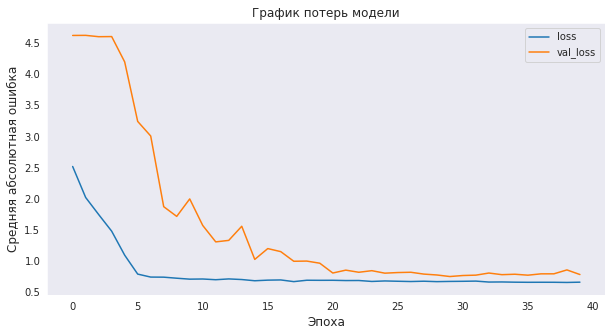

In [141]:
model_loss_plot(history_mn)

10/10 [==============================] - 0s 2ms/step


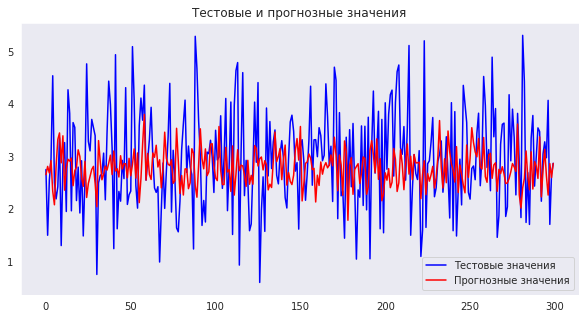

In [142]:
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

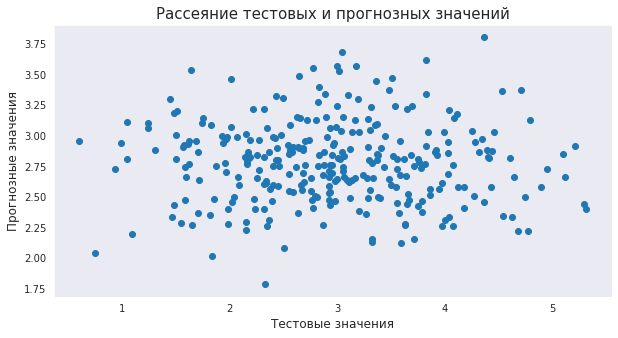

In [143]:
actual_and_predicted_scatter(original_mn, predicted_mn)

In [144]:
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

10/10 [==============================] - 0s 2ms/step - loss: 0.8018
Model MAE: 0.8017675876617432


In [145]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.745328
dtype: float64
